## Studi Dampak Pandemi COVID-19 terhadap Kondisi Sosial, Ekonomi, dan Kependudukan di Indonesia

Oleh: Arsyi Adlani | Tim Py-e Data Science Competition - Mathematical Challenge Festival 2022

## Latar Belakang

Terhitung pada tanggal 18 Juli 2021, pandemi Covid-19 (Corona Virus Disease 2019) telah melanda Indonesia selama 16 bulan sejak pemerintah Indonesia mengumumkan ditemukannya dua kasus pertama Covid-19 pada 2 Maret 2020. Sejak saat itu, berbagai usaha telah dilakukan baik oleh pemerintah pusat maupun pemerintah daerah untuk menekan laju penyebaran dan fatalitas Covid-19. Pandemi ini juga menyebabkan beberapa pemerintah daerah menerapkan kebijakan Pembatasan Sosial Berskala Besar (PSBB) yang berimplikasi terhadap pembatasan aktivitas masyarakat, termasuk aktivitas ekonomi, dan aktivitas sosial lainnya.

Menurunnya berbagai aktivitas akibat berbagai pembatasan sosial ini berdampak pada kondisi sosial-ekonomi masyarakat, khususnya masyarakat rentan dan miskin. Oleh sebab itu, pemerintah, baik di tingkat pusat maupun daerah, mengeluarkan berbagai kebijakan untuk menanggulangi penyebaran COVID-19 serta kebijakan kebijakan yang bersifat penanggulangan dampak sosial dan ekonomi akibat pandemi ini. Kendati demikian, pelaksanaan berbagai kebijakan ini perlu dipantau dan dievaluasi untuk mengetahui efektivitasnya. Oleh karena itu, pada studi ini akan dilakukan analisis dampak pandemi COVID-19 terhadap Kondisi Sosial, Ekonomi, dan Kependudukan di Indonesia.

In [760]:
# Basic Functional Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# Data Preprocessing Libraries
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import shapiro
from scipy.stats import ttest_rel

In [761]:
data = pd.read_csv('Data Sosial dan Kependudukan per Provinsi.csv').iloc[:, 1:]
data.head()

,Provinsi,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),...,Indeks Keparahan Kemiskinan (2021),Indeks Kedalaman Kemiskinan (2016),Indeks Kedalaman Kemiskinan (2017),Indeks Kedalaman Kemiskinan (2018),Indeks Kedalaman Kemiskinan (2019),Indeks Kedalaman Kemiskinan (2020),Indeks Kedalaman Kemiskinan (2021),Indeks Perasaan (2021),Indeks Kepuasan Hidup (2021),Indeks Kebahagiaan (2021)
0,ACEH,14.30,14.31,14.36,8768.0,8957.0,9186.0,9603.0,9492.0,9572.0,...,0.75,3.48,2.98,2.84,2.64,2.72,2.86,63.75,75.50,71.24
1,SUMATERA UTARA,13.15,13.23,13.27,9744.0,10036.0,10391.0,10649.0,10420.0,10499.0,...,0.38,1.77,1.71,1.56,1.37,1.51,1.52,64.14,74.24,70.57
2,SUMATERA BARAT,14.01,14.02,14.09,10126.0,10306.0,10638.0,10925.0,10733.0,10790.0,...,0.24,1.10,1.00,1.04,0.94,0.92,1.04,65.75,74.49,71.34
3,RIAU,13.14,13.20,13.28,10465.0,10677.0,10968.0,11255.0,10675.0,10736.0,...,0.24,1.36,1.32,1.20,1.13,1.14,1.06,65.36,75.58,71.80
4,JAMBI,12.93,12.98,13.04,9795.0,9880.0,10357.0,10592.0,10392.0,10588.0,...,0.30,1.47,1.28,1.30,1.23,1.10,1.29,73.15,76.70,75.17


Berdasarkan problem statement yang telah ditetapkan sebelumnya, terdapat 4 (empat) aspek utama yang perlu dilakukan studi lebih lanjut yang direpresentasikan dengan pertanyaan-pertanyaan sebagai berikut:

1. Bagaimana tingkat pertumbuhan ekonomi masyarakat terdampak COVID-19?
2. Bagaimana harapan hidup masyarakat imbas COVID-19?
3. Bagaimana tingkat kemiskinan masyarakat terdampak COVID-19?

Oleh karena itu, digunakan template dataset 'Data Sosial dan Kependudukan per Provinsi' yang diperoleh melalui Badan Pusat Statistik (BPS) namun dengan penambahan data untuk beberapa tahun sebelum masa pandemi (<2019) pada setiap variabel yang dianalisis dalam rangka meningkatkan kualitas hasil studi perbandingan yang dilakukan.

In [762]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 40 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Provinsi                                                       34 non-null     object 
 1   Harapan Lama Sekolah (2019)                                    34 non-null     float64
 2   Harapan Lama Sekolah (2020)                                    34 non-null     float64
 3   Harapan Lama Sekolah (2021)                                    34 non-null     float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)   34 non-null     float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)   34 non-null     float64
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)   34 non-null     float64
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)   3

Terlihat bahwa terdapat 40 variabel dalam dataset yang akan dianalisis. Untuk kepentingan studi perbandingan yang dilakukan, akan digunakan variabel:

- Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)
- Umur Harapan Hidup Saat Lahir (UHH)
- Indeks Keparahan Kemiskinan
- Indeks Kedalaman Kemiskinan

Untuk setiap aspek yang dikaji akan didasarkan pada data per provinsi di Indonesia yang direpresentasikan oleh variabel 'Provinsi' sebagai indeks dari data.

In [763]:
# Drop unnecessary variables
dropped_columns = ['Harapan Lama Sekolah (2019)',
                   'Harapan Lama Sekolah (2020)', 'Harapan Lama Sekolah (2021)',
                   'Rata-rata Lama Sekolah (2019)', 'Rata-rata Lama Sekolah (2020)',
                   'Rata-rata Lama Sekolah (2021)',
                   'Indeks Pembangunan Manusia (2019)',
                   'Indeks Pembangunan Manusia (2020)',
                   'Indeks Pembangunan Manusia (2021)',
                   'Peringkat Indeks Pembangunan Manusia (2019)',
                   'Peringkat Indeks Pembangunan Manusia (2020)',
                   'Peringkat Indeks Pembangunan Manusia (2021)',
                   'Indeks Perasaan (2021)',
                   'Indeks Kepuasan Hidup (2021)',
                   'Indeks Kebahagiaan (2021)']

df = data.drop(dropped_columns, axis=1).iloc[:-1, :]

### A. Eksplorasi Awal Dataset

In [764]:
df.head(10)

,Provinsi,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Umur Harapan Hidup Saat Lahir (UHH) (2016),Umur Harapan Hidup Saat Lahir (UHH) (2017),Umur Harapan Hidup Saat Lahir (UHH) (2018),...,Indeks Keparahan Kemiskinan (2018),Indeks Keparahan Kemiskinan (2019),Indeks Keparahan Kemiskinan (2020),Indeks Keparahan Kemiskinan (2021),Indeks Kedalaman Kemiskinan (2016),Indeks Kedalaman Kemiskinan (2017),Indeks Kedalaman Kemiskinan (2018),Indeks Kedalaman Kemiskinan (2019),Indeks Kedalaman Kemiskinan (2020),Indeks Kedalaman Kemiskinan (2021)
0,ACEH,8768.0,8957.0,9186.0,9603.0,9492.0,9572.0,69.51,69.52,69.64,...,0.75,0.66,0.71,0.75,3.48,2.98,2.84,2.64,2.72,2.86
1,SUMATERA UTARA,9744.0,10036.0,10391.0,10649.0,10420.0,10499.0,68.33,68.37,68.61,...,0.41,0.31,0.39,0.38,1.77,1.71,1.56,1.37,1.51,1.52
2,SUMATERA BARAT,10126.0,10306.0,10638.0,10925.0,10733.0,10790.0,68.73,68.78,69.01,...,0.24,0.21,0.20,0.24,1.10,1.00,1.04,0.94,0.92,1.04
3,RIAU,10465.0,10677.0,10968.0,11255.0,10675.0,10736.0,70.97,70.99,71.19,...,0.30,0.27,0.28,0.24,1.36,1.32,1.20,1.13,1.14,1.06
4,JAMBI,9795.0,9880.0,10357.0,10592.0,10392.0,10588.0,70.71,70.76,70.89,...,0.32,0.30,0.25,0.30,1.47,1.28,1.30,1.23,1.10,1.29
5,SUMATERA SELATAN,9935.0,10220.0,10652.0,10937.0,10652.0,10662.0,69.16,69.18,69.41,...,0.60,0.51,0.48,0.54,2.01,2.24,2.33,2.12,2.08,2.26
6,BENGKULU,9492.0,9778.0,10162.0,10409.0,10380.0,10487.0,68.56,68.59,68.84,...,0.61,0.58,0.56,0.62,3.14,2.85,2.59,2.48,2.40,2.57
7,LAMPUNG,9156.0,9413.0,9858.0,10114.0,9982.0,10038.0,69.94,69.95,70.18,...,0.48,0.44,0.41,0.42,2.63,2.16,2.04,1.93,1.90,1.88
8,KEP. BANGKA BELITUNG,11960.0,12066.0,12666.0,12959.0,12794.0,12819.0,69.92,69.95,70.18,...,0.14,0.10,0.13,0.11,0.67,0.49,0.68,0.51,0.60,0.61
9,KEPULAUAN RIAU,13359.0,13566.0,13976.0,14466.0,14209.0,14122.0,69.45,69.48,69.64,...,0.24,0.12,0.29,0.28,0.89,0.97,1.00,0.69,1.11,1.07


In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Provinsi                                                       34 non-null     object 
 1   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)   34 non-null     float64
 2   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)   34 non-null     float64
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)   34 non-null     float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)   34 non-null     float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)  34 non-null     float64
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)  34 non-null     float64
 7   Umur Harapan Hidup Saat Lahir (UHH) (2016)                     3

Terlihat bahwa terdapat total 25 variabel dalam dataset yang digunakan untuk analisis. Keseluruhan variabel ini dapat dibagi menjadi aspek analisis, yaitu Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang), Umur Harapan Hidup Saat Lahir (UHH), serta Indeks Keparahan dan Kedalaman Kemiskinan dalam rentang waktu 2016-2021 untuk 34 provinsi di Indonesia.

In [766]:
# Further checking the dataset null values
df.isnull().sum()

Provinsi                                                         0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)     0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)     0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)     0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)    0
Umur Harapan Hidup Saat Lahir (UHH) (2016)                       0
Umur Harapan Hidup Saat Lahir (UHH) (2017)                       0
Umur Harapan Hidup Saat Lahir (UHH) (2018)                       0
Umur Harapan Hidup Saat Lahir (UHH) (2019)                       0
Umur Harapan Hidup Saat Lahir (UHH) (2020)                       0
Umur Harapan Hidup Saat Lahir (UHH) (2021)                       0
Indeks Keparahan Kemiskinan (2016)                               0
Indeks Keparahan Kemiskinan (2017)                            

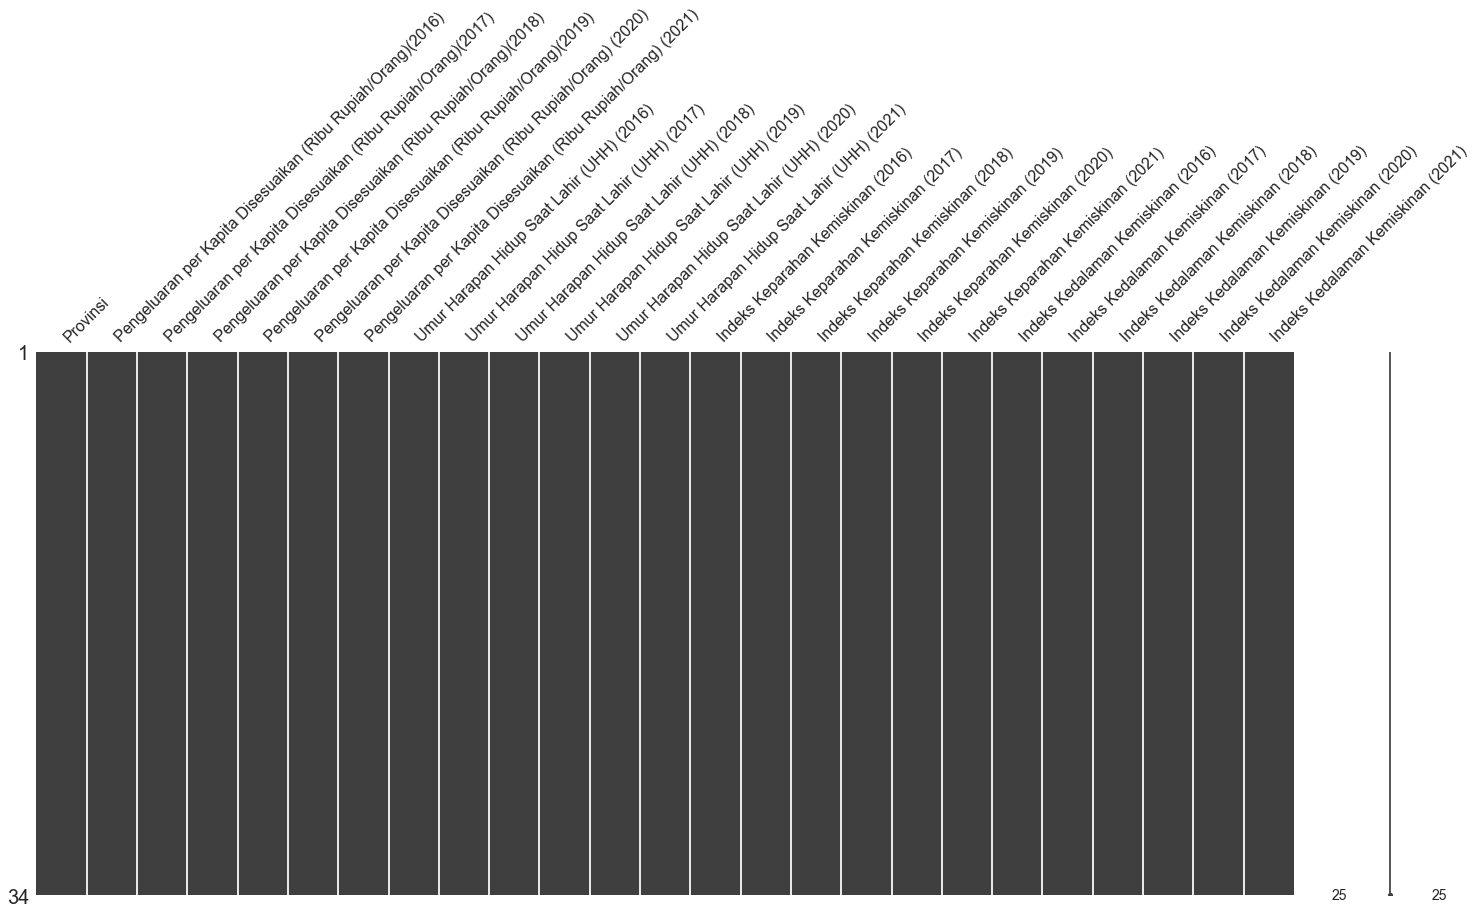

In [767]:
# Visualizing null values in the dataset
msno.matrix(df)

In [768]:
df.duplicated().sum()

0

Terlihat bahwa dataset telah bersih dari kehadiran null values serta tidak ada entri duplikat pada dataset sehingga siap digunakan untuk analisis lebih lanjut.

### B. Analisis Univariat Awal

Pada bagian ini, akan dilakukan analisis distribusi univariat tanpa mempertimbangkan terlebih dahulu signifikansi statistik perubahan tren yang mungkin teramati pada setiap variabel yang dianalisis di masa prapandemi dan masa pandemi.

### B.1. Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)

Variabel ini merupakan variabel yang menunjukkan biaya yang dikeluarkan untuk konsumsi semua anggota rumah tangga selama sebulan dibagi dengan banyaknya anggota rumah tangga yang telah disesuaikan dengan paritas daya beli. Berdasarkan Laporan Indeks Pembangunan Manusia 2020 yang dikeluarkan oleh Badan Pusat Statistik (BPS), variabel Pengeluaran per kapita Disesuaikan ini mampu mencerminkan indikator pendapatan masyarakat dan menggambarkan tingkat kesejahteraan yang dinikmati oleh penduduk sebagai output dari semakin membaiknya perekonomian.

In [769]:
columns = ['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']

df[columns].describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,10028.676471,10274.647059,10622.911765,10915.588235,10685.794118,10759.470588
std,2122.608868,2116.211407,2167.455922,2213.465884,2186.384864,2213.899429
min,6637.000000,6996.000000,7159.000000,7336.000000,6954.000000,6955.000000
25%,8793.750000,8991.250000,9205.000000,9477.750000,9332.000000,9378.750000
50%,9865.000000,10128.000000,10514.500000,10787.000000,10536.000000,10625.000000
75%,10652.500000,10899.000000,11277.000000,11618.000000,11489.250000,11576.250000
max,17468.000000,17707.000000,18128.000000,18527.000000,18227.000000,18520.000000


Dari analisis statistik dasar di atas, terlihat bahwa terjadi pada masa prapandemi (2016-2018) terjadi pola peningkatan rata-rata Pengeluaran per Kapita Disesuaikan yang konsisten. Namun, terlihat bahwa terjadi penurunan Pengeluaran per Kapita Disesuaikan pada transisi tahun 2019 menuju tahun 2020. Hal ini memiliki kemungkinan terjadi akibat guncangan ekonomi (economical shock) akibat wabah pandemi yang mulai melanda di akhir tahun 2019. Sementara itu, transisi dari tahun 2020 menuju tahun 2021 mulai terlihat adanya pemulihan ekonomi dan kembali terjadi peningkatan (bounce-back) Pengeluaran per Kapita Disesuaikan meskipun secara nilai pertumbuhan masih relatif jauh di bawah masa prapandemi.

#### B.1.1. Masa Prapandemi (Tahun 2016-2018)

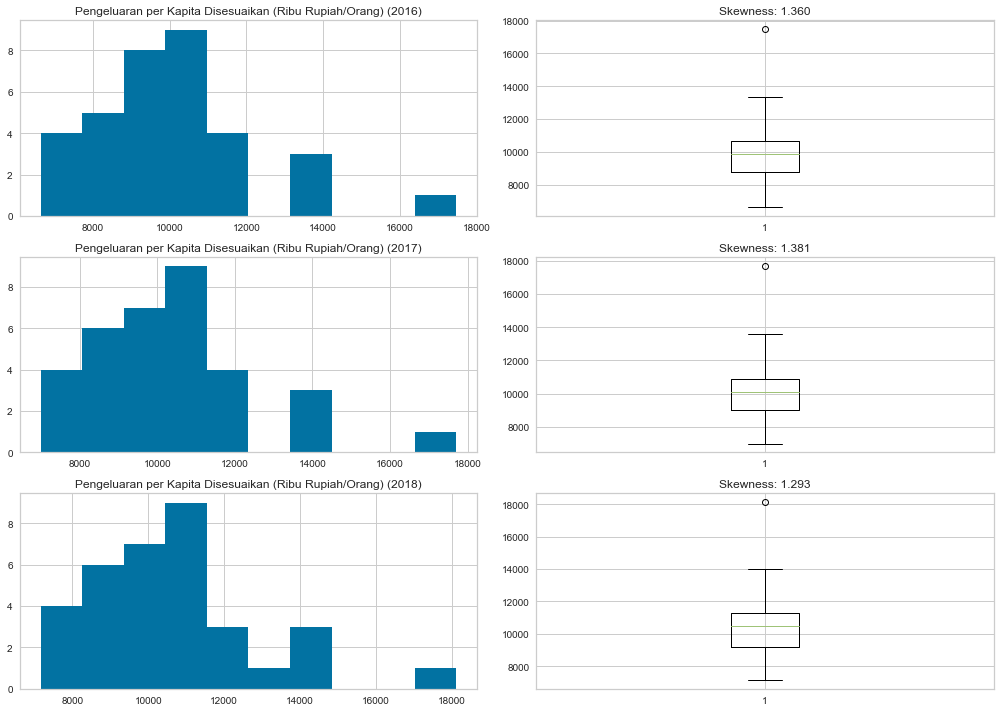

In [770]:
# Calculating skewness coefficients
skew_2016 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)'].skew()
skew_2017 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)'].skew()
skew_2018 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)'], density=False)
ax[0,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2016)')
ax[0,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)'])
ax[0,1].set_title(f'Skewness: {skew_2016:.3f}')

ax[1,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)'], density=False)
ax[1,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2017)')
ax[1,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)'])
ax[1,1].set_title(f'Skewness: {skew_2017:.3f}')

ax[2,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)'], density=False)
ax[2,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2018)')
ax[2,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)'])
ax[2,1].set_title(f'Skewness: {skew_2018:.3f}')

plt.tight_layout()
plt.show()

#### B.1.2. Masa Pandemi (Tahun 2019-2021)

Text(0.5, 1.0, 'Skewness: 1.276')

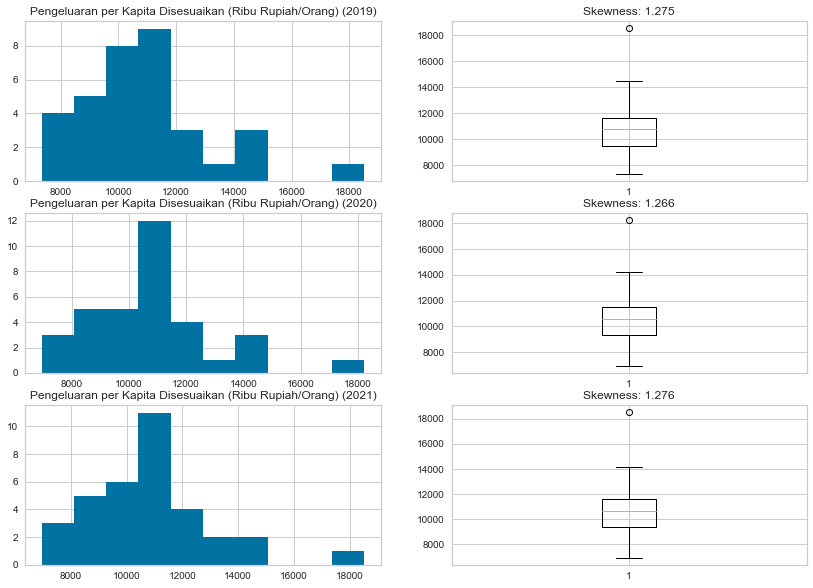

In [771]:
# Calculating skewness coefficients
skew_2019 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)'].skew()
skew_2020 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)'].skew()
skew_2021 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)'], density=False)
ax[0,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2019)')
ax[0,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)'])
ax[0,1].set_title(f'Skewness: {skew_2019:.3f}')

ax[1,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)'], density=False)
ax[1,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)')
ax[1,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)'])
ax[1,1].set_title(f'Skewness: {skew_2020:.3f}')

ax[2,0].hist(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)'], density=False)
ax[2,0].set_title('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)')
ax[2,1].boxplot(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)'])
ax[2,1].set_title(f'Skewness: {skew_2021:.3f}')

Dari hasil analisis distribusi di atas, terlihat bahwa Pengeluaran per Kapita Disesuaikan memiliki distribusi skewed positif dengan outliers berupa masyarakat atas pada provinsi dengan pengeluaran tinggi. Selain itu, terlihat bahwa terjadi penurunan skewness antara masa prapandemi dengan masa pandemi yang menunjukkan terjadinya pengurangan pengeluaran (spending) masyarakat selama masa pandemi yang cukup signifikan.

### B.2. Umur Harapan Hidup (UHH)

Variabel Umur Harapan Hidup (UHH) ini merupakan variabel yang menunjukkan rata-rata perkiraan banyak tahun yang dapat ditempuh oleh seseorang sejak lahir.

In [772]:
columns = ['Umur Harapan Hidup Saat Lahir (UHH) (2016)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2017)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2018)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2021)']

df[columns].describe()

,Umur Harapan Hidup Saat Lahir (UHH) (2016),Umur Harapan Hidup Saat Lahir (UHH) (2017),Umur Harapan Hidup Saat Lahir (UHH) (2018),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,69.379412,69.412647,69.621765,69.890588,70.040882,70.149706
std,2.653476,2.654222,2.611187,2.548223,2.523193,2.512667
min,64.310000,64.340000,64.580000,64.820000,65.060000,65.250000
25%,67.612500,67.660000,67.907500,68.295000,68.667500,68.830000
50%,69.540000,69.555000,69.640000,69.855000,69.960000,70.070000
75%,70.912500,70.942500,71.135000,71.405000,71.525000,71.597500
max,74.710000,74.740000,74.820000,74.920000,74.990000,75.040000


Dari analisis statistik dasar di atas, terlihat bahwa berbeda dengan kasus Pengeluaran per Kapita Disesuaikan di bagian sebelumnya, untuk Umur Harapan Hidup Saat Lahir (UHH) masih memiliki tren peningkatan pada masa pandemi (2019-2021) meskipun pertumbuhannya melambat. Namun demikian, yang menarik adalah terjadi penurunan standar deviasi Umur Harapan Hidup Saat Lahir (UHH) 34 provinsi di Indonesia pada masa pandemi. Artinya, meskipun terjadi pelambatan pertumbuhan, variabilitas angka Umur Harapan Hidup Saat Lahir (UHH) antarprovinsi di Indonesia justru mengalami perbaikan di masa pandemi.

#### B.2.1. Masa Prapandemi (Tahun 2016-2018)

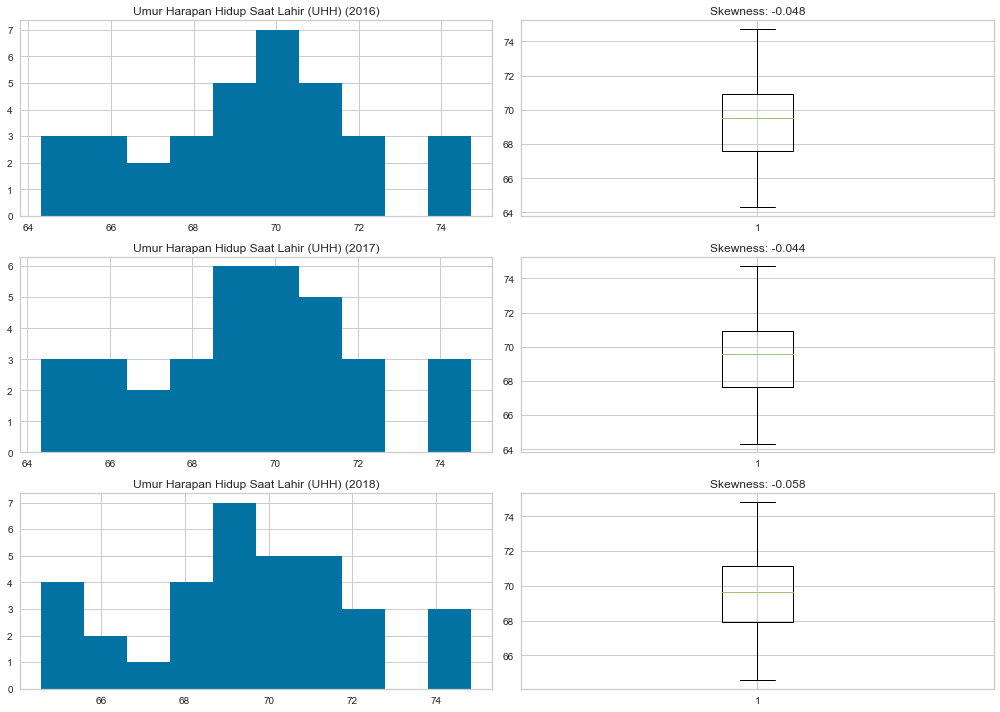

In [773]:
# Calculating skewness coefficients
skew_2016 = df['Umur Harapan Hidup Saat Lahir (UHH) (2016)'].skew()
skew_2017 = df['Umur Harapan Hidup Saat Lahir (UHH) (2017)'].skew()
skew_2018 = df['Umur Harapan Hidup Saat Lahir (UHH) (2018)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2016)'], density=False)
ax[0,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2016)')
ax[0,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2016)'])
ax[0,1].set_title(f'Skewness: {skew_2016:.3f}')

ax[1,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2017)'], density=False)
ax[1,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2017)')
ax[1,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2017)'])
ax[1,1].set_title(f'Skewness: {skew_2017:.3f}')

ax[2,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2018)'], density=False)
ax[2,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2018)')
ax[2,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2018)'])
ax[2,1].set_title(f'Skewness: {skew_2018:.3f}')

plt.tight_layout()
plt.show()

#### B.2.2. Masa Pandemi (Tahun 2019-2021)

Text(0.5, 1.0, 'Skewness: -0.070')

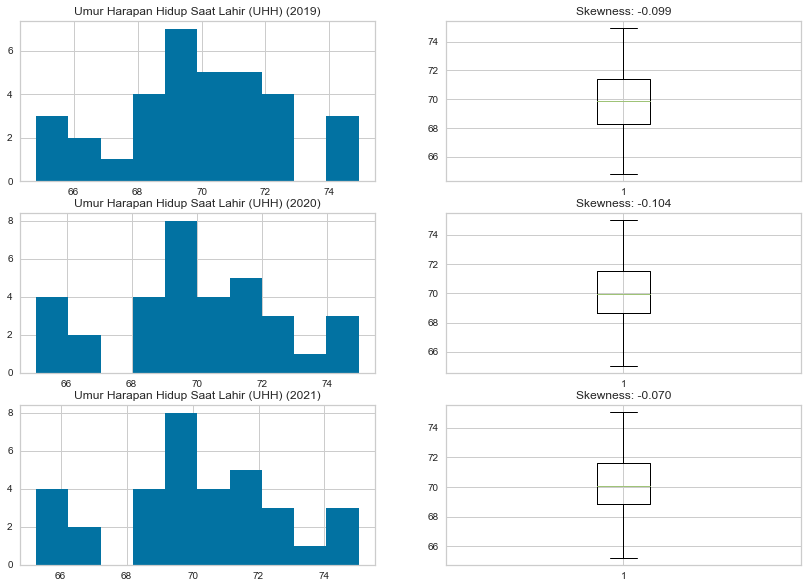

In [774]:
# Calculating skewness coefficients
skew_2019 = df['Umur Harapan Hidup Saat Lahir (UHH) (2019)'].skew()
skew_2020 = df['Umur Harapan Hidup Saat Lahir (UHH) (2020)'].skew()
skew_2021 = df['Umur Harapan Hidup Saat Lahir (UHH) (2021)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2019)'], density=False)
ax[0,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2019)')
ax[0,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2019)'])
ax[0,1].set_title(f'Skewness: {skew_2019:.3f}')

ax[1,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2020)'], density=False)
ax[1,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2020)')
ax[1,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2020)'])
ax[1,1].set_title(f'Skewness: {skew_2020:.3f}')

ax[2,0].hist(df['Umur Harapan Hidup Saat Lahir (UHH) (2021)'], density=False)
ax[2,0].set_title('Umur Harapan Hidup Saat Lahir (UHH) (2021)')
ax[2,1].boxplot(df['Umur Harapan Hidup Saat Lahir (UHH) (2021)'])
ax[2,1].set_title(f'Skewness: {skew_2021:.3f}')

Dari hasil analisis distribusi di atas, terlihat bahwa Umur Harapan Hidup Disesuaikan memiliki distribusi skewed negatif. Hal menarik yang dapat diperoleh adalah meskipun standar deviasi diketahui mengalami penurunan, terjadi peningkatan rata-rata skewness pada masa pandemi. Hal ini menunjukkan bahwa meski secara keseluruhan terjadi perbaikan ketimpangan Umur Harapan Hidup (UHH) antarprovinsi di Indonesia, namun terdapat provinsi yang masih mengalami ketertinggalan sehingga menjadi outliers dan membuat skewness pada distribusi data meningkat.

### B.3. Indeks Keparahan Kemiskinan

Variabel Indeks Keparahan Kemiskinan adalah variabel yang menunjukkan seberapa jauh jarak pengeluaran orang termiskin di satu wilayah tertentu relatif terhadap pengeluaran rata-rata kelompok miskin di sana. Semakin tinggi angka indeksnya, semakin parah kemiskinannya, maka harus semakin terukur dan tepat sasaran alokasi dana yang dibutuhkan untuk daerah tersebut keluar dari kemiskinan.

In [775]:
columns = ['Indeks Keparahan Kemiskinan (2016)',
           'Indeks Keparahan Kemiskinan (2017)',
           'Indeks Keparahan Kemiskinan (2018)',
           'Indeks Keparahan Kemiskinan (2019)',
           'Indeks Keparahan Kemiskinan (2020)',
           'Indeks Keparahan Kemiskinan (2021)']

df[columns].describe()

,Indeks Keparahan Kemiskinan (2016),Indeks Keparahan Kemiskinan (2017),Indeks Keparahan Kemiskinan (2018),Indeks Keparahan Kemiskinan (2019),Indeks Keparahan Kemiskinan (2020),Indeks Keparahan Kemiskinan (2021)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.677353,0.583529,0.535882,0.484118,0.491176,0.495000
std,0.811173,0.590223,0.513733,0.517705,0.465551,0.414358
min,0.080000,0.080000,0.110000,0.100000,0.100000,0.110000
25%,0.210000,0.230000,0.240000,0.210000,0.230000,0.240000
50%,0.465000,0.440000,0.395000,0.310000,0.365000,0.380000
75%,0.760000,0.690000,0.607500,0.562500,0.552500,0.605000
max,4.190000,2.820000,2.380000,2.600000,2.080000,1.960000


Dari analisis statistik dasar di atas, terlihat bahwa berbeda dengan tingkat keparahan kemiskinan mengalami kondisi yang semakin memburuk pada masa pandemi dengan terjadinya tren peningkatan rata-rata indeks keparahan kemiskinan. Selain itu, terjadi penurunan standar deviasi pada masa pandemi yang artinya menunjukkan bahwa memburuknya kondisi keparahan kemiskinan terjadi secara menyeluruh di Indonesia.

#### B.3.1. Masa Prapandemi (Tahun 2016-2018)

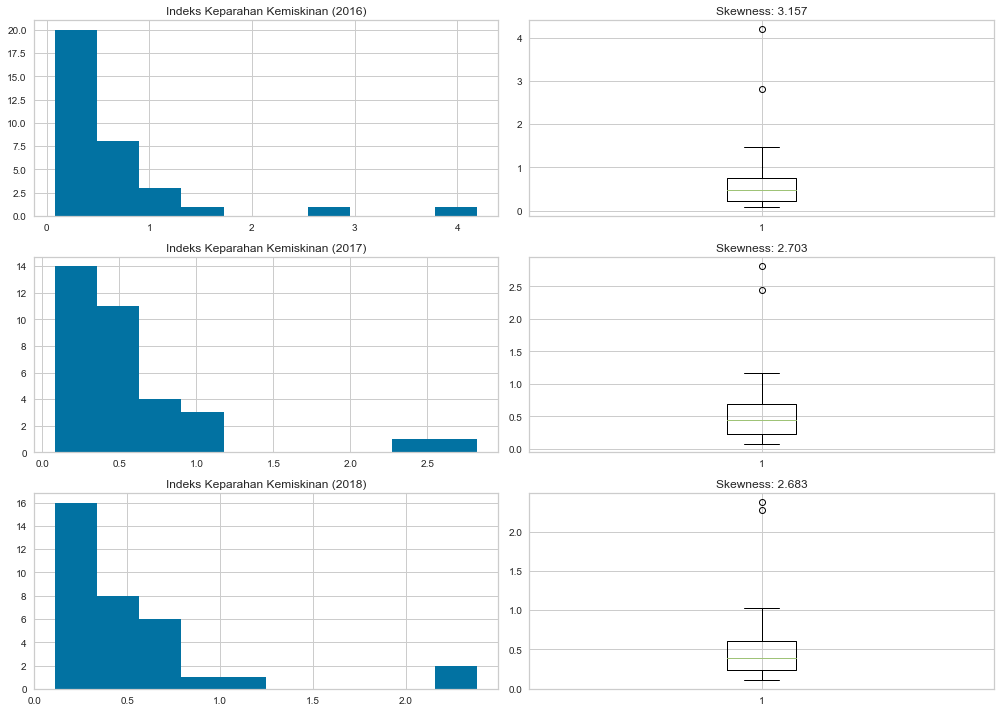

In [776]:
# Calculating skewness coefficients
skew_2016 = df['Indeks Keparahan Kemiskinan (2016)'].skew()
skew_2017 = df['Indeks Keparahan Kemiskinan (2017)'].skew()
skew_2018 = df['Indeks Keparahan Kemiskinan (2018)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Indeks Keparahan Kemiskinan (2016)'], density=False)
ax[0,0].set_title('Indeks Keparahan Kemiskinan (2016)')
ax[0,1].boxplot(df['Indeks Keparahan Kemiskinan (2016)'])
ax[0,1].set_title(f'Skewness: {skew_2016:.3f}')

ax[1,0].hist(df['Indeks Keparahan Kemiskinan (2017)'], density=False)
ax[1,0].set_title('Indeks Keparahan Kemiskinan (2017)')
ax[1,1].boxplot(df['Indeks Keparahan Kemiskinan (2017)'])
ax[1,1].set_title(f'Skewness: {skew_2017:.3f}')

ax[2,0].hist(df['Indeks Keparahan Kemiskinan (2018)'], density=False)
ax[2,0].set_title('Indeks Keparahan Kemiskinan (2018)')
ax[2,1].boxplot(df['Indeks Keparahan Kemiskinan (2018)'])
ax[2,1].set_title(f'Skewness: {skew_2018:.3f}')

plt.tight_layout()
plt.show()

#### B.3.2. Masa Pandemi (Tahun 2019-2021)

Text(0.5, 1.0, 'Skewness: 2.191')

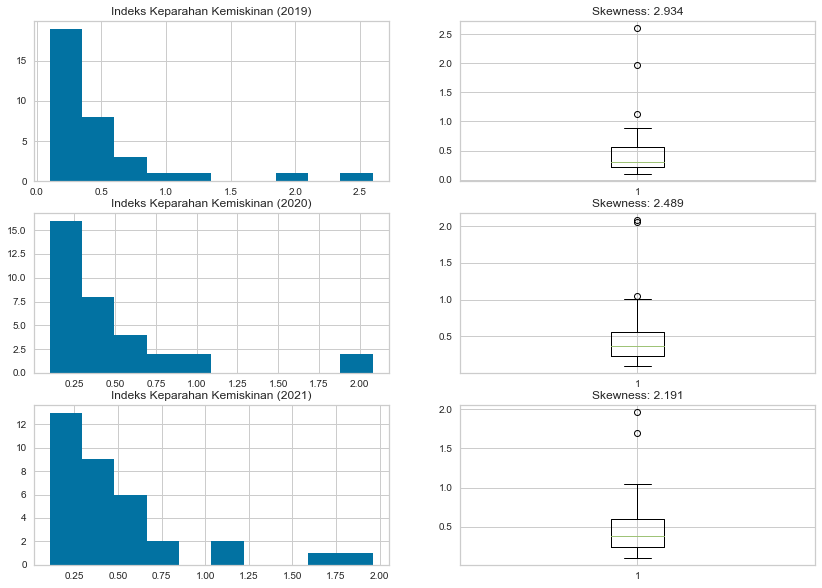

In [777]:
# Calculating skewness coefficients
skew_2019 = df['Indeks Keparahan Kemiskinan (2019)'].skew()
skew_2020 = df['Indeks Keparahan Kemiskinan (2020)'].skew()
skew_2021 = df['Indeks Keparahan Kemiskinan (2021)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Indeks Keparahan Kemiskinan (2019)'], density=False)
ax[0,0].set_title('Indeks Keparahan Kemiskinan (2019)')
ax[0,1].boxplot(df['Indeks Keparahan Kemiskinan (2019)'])
ax[0,1].set_title(f'Skewness: {skew_2019:.3f}')

ax[1,0].hist(df['Indeks Keparahan Kemiskinan (2020)'], density=False)
ax[1,0].set_title('Indeks Keparahan Kemiskinan (2020)')
ax[1,1].boxplot(df['Indeks Keparahan Kemiskinan (2020)'])
ax[1,1].set_title(f'Skewness: {skew_2020:.3f}')

ax[2,0].hist(df['Indeks Keparahan Kemiskinan (2021)'], density=False)
ax[2,0].set_title('Indeks Keparahan Kemiskinan (2021)')
ax[2,1].boxplot(df['Indeks Keparahan Kemiskinan (2021)'])
ax[2,1].set_title(f'Skewness: {skew_2021:.3f}')

Dari hasil analisis distribusi di atas, mengkonfirmasi temuan sebelumnya bahwa memburuknya tingkat keparahan kemiskinan terjadi secara menyeluruh di Indonesia yang ditunjukkan dengan terjadinya penurunan standar deviasi dan rata-rata dari positive-skewness.

### B.4. Indeks Kedalaman Kemiskinan

Variabel Indeks Kedalaman Kemiskinan adalah variabel yang menunjukkan seberapa jauh beda pengeluaran penduduk miskin dari garis kemiskinan. Dengan asumsi garis kemiskinan sama, wilayah yang rata-rata warga miskinnya hanya mampu belanja Rp10.000/hari misalnya, akan lebih dalam kemiskinannya dari wilayah yang rata-rata warga miskinnya mampu belanja Rp30.000/hari.

In [778]:
columns = ['Indeks Kedalaman Kemiskinan (2016)',
           'Indeks Kedalaman Kemiskinan (2017)',
           'Indeks Kedalaman Kemiskinan (2018)',
           'Indeks Kedalaman Kemiskinan (2019)',
           'Indeks Kedalaman Kemiskinan (2020)',
           'Indeks Kedalaman Kemiskinan (2021)']

df[columns].describe()

,Indeks Kedalaman Kemiskinan (2016),Indeks Kedalaman Kemiskinan (2017),Indeks Kedalaman Kemiskinan (2018),Indeks Kedalaman Kemiskinan (2019),Indeks Kedalaman Kemiskinan (2020),Indeks Kedalaman Kemiskinan (2021)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.254706,2.080294,1.965294,1.842353,1.864118,1.897059
std,1.894394,1.603739,1.443194,1.443300,1.341320,1.252301
min,0.460000,0.490000,0.510000,0.500000,0.520000,0.610000
25%,0.927500,0.977500,1.010000,0.917500,1.002500,1.045000
50%,1.800000,1.715000,1.555000,1.410000,1.520000,1.505000
75%,2.750000,2.472500,2.525000,2.305000,2.320000,2.380000
max,9.370000,7.500000,6.730000,7.170000,6.160000,5.600000


Dari analisis statistik dasar di atas, serupa dengan Indeks Keparahan Kemiskinan, terlihat bahwa Indeks Kedalaman Kemiskinan juga mengalami kondisi yang semakin memburuk pada masa pandemi dengan terjadinya tren peningkatan rata-rata indeks kedalaman kemiskinan. Selain itu, terjadi penurunan standar deviasi pada masa pandemi yang artinya menunjukkan bahwa memburuknya kondisi kedalaman kemiskinan terjadi secara menyeluruh di Indonesia.

#### B.4.1. Masa Prapandemi (Tahun 2016-2018)

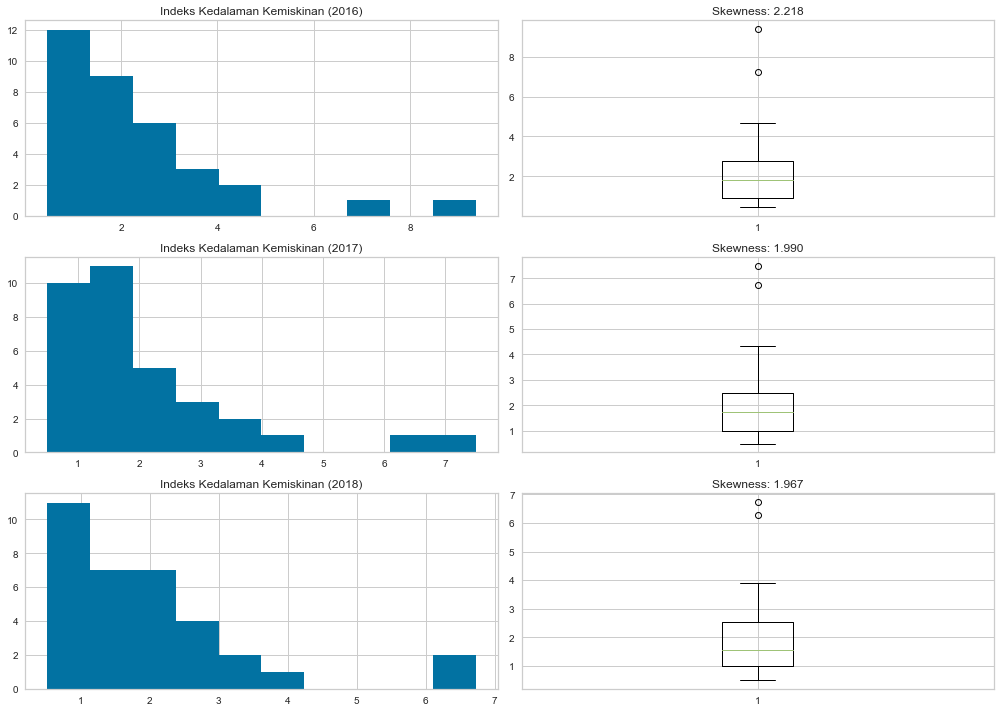

In [779]:
# Calculating skewness coefficients
skew_2016 = df['Indeks Kedalaman Kemiskinan (2016)'].skew()
skew_2017 = df['Indeks Kedalaman Kemiskinan (2017)'].skew()
skew_2018 = df['Indeks Kedalaman Kemiskinan (2018)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Indeks Kedalaman Kemiskinan (2016)'], density=False)
ax[0,0].set_title('Indeks Kedalaman Kemiskinan (2016)')
ax[0,1].boxplot(df['Indeks Kedalaman Kemiskinan (2016)'])
ax[0,1].set_title(f'Skewness: {skew_2016:.3f}')

ax[1,0].hist(df['Indeks Kedalaman Kemiskinan (2017)'], density=False)
ax[1,0].set_title('Indeks Kedalaman Kemiskinan (2017)')
ax[1,1].boxplot(df['Indeks Kedalaman Kemiskinan (2017)'])
ax[1,1].set_title(f'Skewness: {skew_2017:.3f}')

ax[2,0].hist(df['Indeks Kedalaman Kemiskinan (2018)'], density=False)
ax[2,0].set_title('Indeks Kedalaman Kemiskinan (2018)')
ax[2,1].boxplot(df['Indeks Kedalaman Kemiskinan (2018)'])
ax[2,1].set_title(f'Skewness: {skew_2018:.3f}')

plt.tight_layout()
plt.show()

#### B.4.2. Masa Pandemi (Tahun 2019-2021)

Text(0.5, 1.0, 'Skewness: 1.605')

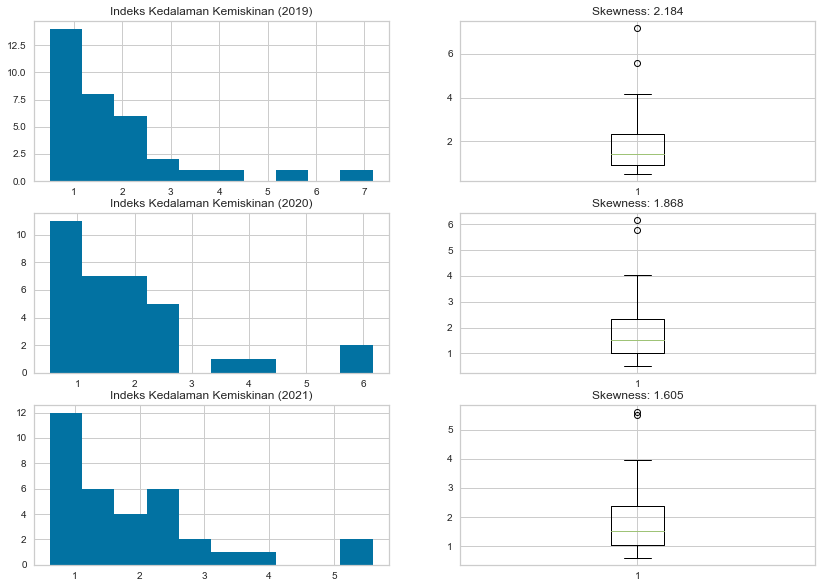

In [780]:
# Calculating skewness coefficients
skew_2019 = df['Indeks Kedalaman Kemiskinan (2019)'].skew()
skew_2020 = df['Indeks Kedalaman Kemiskinan (2020)'].skew()
skew_2021 = df['Indeks Kedalaman Kemiskinan (2021)'].skew()

# Visualizing data distribution
fig, ax = plt.subplots(3,2,figsize=(14,10))
ax[0,0].hist(df['Indeks Kedalaman Kemiskinan (2019)'], density=False)
ax[0,0].set_title('Indeks Kedalaman Kemiskinan (2019)')
ax[0,1].boxplot(df['Indeks Kedalaman Kemiskinan (2019)'])
ax[0,1].set_title(f'Skewness: {skew_2019:.3f}')

ax[1,0].hist(df['Indeks Kedalaman Kemiskinan (2020)'], density=False)
ax[1,0].set_title('Indeks Kedalaman Kemiskinan (2020)')
ax[1,1].boxplot(df['Indeks Kedalaman Kemiskinan (2020)'])
ax[1,1].set_title(f'Skewness: {skew_2020:.3f}')

ax[2,0].hist(df['Indeks Kedalaman Kemiskinan (2021)'], density=False)
ax[2,0].set_title('Indeks Kedalaman Kemiskinan (2021)')
ax[2,1].boxplot(df['Indeks Kedalaman Kemiskinan (2021)'])
ax[2,1].set_title(f'Skewness: {skew_2021:.3f}')

Dari hasil analisis distribusi di atas, mengkonfirmasi temuan sebelumnya bahwa memburuknya tingkat kedalaman kemiskinan juga terjadi secara menyeluruh di Indonesia yang ditunjukkan dengan terjadinya penurunan standar deviasi dan rata-rata dari positive-skewness.

### C. Analisis Multivariat

Pada analisis multivariat, akan dilihat hubungan kovarians dan korelasi antar variabel. Kovarians yang bernilai positif antara variabel A dan B bermakna bahwa nilai A dan B berbanding lurus (Semakin besar nilai A, maka semakin besar pula nilai B). Sebaliknya, nilai kovarians yang negatif bermakna bahwa nilai A dan B berbanding terbalik.

Sementara itu, nilai korelasi menunjukkan tingkat "kekuatan" hubungan yang diperoleh. Nilai korelasi yang mendekati 0 bermakna bahwa hubungan antara A dan B yang diperoleh (baik itu berbanding lurus ataupun terbalik) tidak signifikan/sangat lemah.

### C.1. Masa Prapandemi

In [781]:
columns = ['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2016)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2017)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2018)',
           'Indeks Keparahan Kemiskinan (2016)',
           'Indeks Keparahan Kemiskinan (2017)',
           'Indeks Keparahan Kemiskinan (2018)',
           'Indeks Kedalaman Kemiskinan (2016)',
           'Indeks Kedalaman Kemiskinan (2017)',
           'Indeks Kedalaman Kemiskinan (2018)']

#### C.1.1. Analisis Kovarians

In [782]:
df[columns].cov()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),Umur Harapan Hidup Saat Lahir (UHH) (2016),Umur Harapan Hidup Saat Lahir (UHH) (2017),Umur Harapan Hidup Saat Lahir (UHH) (2018),Indeks Keparahan Kemiskinan (2016),Indeks Keparahan Kemiskinan (2017),Indeks Keparahan Kemiskinan (2018),Indeks Kedalaman Kemiskinan (2016),Indeks Kedalaman Kemiskinan (2017),Indeks Kedalaman Kemiskinan (2018)
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),4.505468e+06,4.489847e+06,4.596038e+06,3297.749198,3312.489367,3254.382103,-920.504822,-702.441551,-608.806827,-2358.154492,-2021.693841,-1831.448841
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),4.489847e+06,4.478351e+06,4.582935e+06,3247.239180,3261.916114,3204.804884,-897.783387,-685.282353,-595.014831,-2306.041622,-1975.489893,-1792.069287
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),4.596038e+06,4.582935e+06,4.697865e+06,3341.476613,3356.930241,3296.862585,-933.394180,-709.738164,-615.672496,-2389.931693,-2043.134519,-1853.921034
Umur Harapan Hidup Saat Lahir (UHH) (2016),3.297749e+03,3.247239e+03,3.341477e+03,7.040933,7.042708,6.926319,-1.091977,-0.866986,-0.768748,-2.744552,-2.430166,-2.230385
Umur Harapan Hidup Saat Lahir (UHH) (2017),3.312489e+03,3.261916e+03,3.356930e+03,7.042708,7.044893,6.928135,-1.096475,-0.869758,-0.771143,-2.755267,-2.438077,-2.237787
Umur Harapan Hidup Saat Lahir (UHH) (2018),3.254382e+03,3.204805e+03,3.296863e+03,6.926319,6.928135,6.818300,-1.083038,-0.859519,-0.761829,-2.715766,-2.404528,-2.205988
Indeks Keparahan Kemiskinan (2016),-9.205048e+02,-8.977834e+02,-9.333942e+02,-1.091977,-1.096475,-1.083038,0.658002,0.467652,0.397322,1.502616,1.240477,1.108039
Indeks Keparahan Kemiskinan (2017),-7.024416e+02,-6.852824e+02,-7.097382e+02,-0.866986,-0.869758,-0.859519,0.467652,0.348363,0.300142,1.096925,0.933393,0.836850
Indeks Keparahan Kemiskinan (2018),-6.088068e+02,-5.950148e+02,-6.156725e+02,-0.768748,-0.771143,-0.761829,0.397322,0.300142,0.263922,0.940087,0.804519,0.729016
Indeks Kedalaman Kemiskinan (2016),-2.358154e+03,-2.306042e+03,-2.389932e+03,-2.744552,-2.755267,-2.715766,1.502616,1.096925,0.940087,3.588729,3.006126,2.694817


#### C.1.2. Analisis Korelasi

In [783]:
df[columns].corr(method='spearman')

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),Umur Harapan Hidup Saat Lahir (UHH) (2016),Umur Harapan Hidup Saat Lahir (UHH) (2017),Umur Harapan Hidup Saat Lahir (UHH) (2018),Indeks Keparahan Kemiskinan (2016),Indeks Keparahan Kemiskinan (2017),Indeks Keparahan Kemiskinan (2018),Indeks Kedalaman Kemiskinan (2016),Indeks Kedalaman Kemiskinan (2017),Indeks Kedalaman Kemiskinan (2018)
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016),1.000000,0.998778,0.995416,0.597250,0.598258,0.603702,-0.633654,-0.633244,-0.644451,-0.623835,-0.630043,-0.662439
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017),0.998778,1.000000,0.995111,0.595111,0.596119,0.600643,-0.639615,-0.640122,-0.649954,-0.630252,-0.637072,-0.669010
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018),0.995416,0.995111,1.000000,0.596333,0.596730,0.601866,-0.634877,-0.628812,-0.639101,-0.623224,-0.626987,-0.656632
Umur Harapan Hidup Saat Lahir (UHH) (2016),0.597250,0.595111,0.596333,1.000000,0.999847,0.998930,-0.453920,-0.477646,-0.477836,-0.464018,-0.477231,-0.488845
Umur Harapan Hidup Saat Lahir (UHH) (2017),0.598258,0.596119,0.596730,0.999847,1.000000,0.998930,-0.458575,-0.481388,-0.481578,-0.468674,-0.481201,-0.492740
Umur Harapan Hidup Saat Lahir (UHH) (2018),0.603702,0.600643,0.601866,0.998930,0.998930,1.000000,-0.461827,-0.483972,-0.483933,-0.471092,-0.482637,-0.494264
Indeks Keparahan Kemiskinan (2016),-0.633654,-0.639615,-0.634877,-0.453920,-0.458575,-0.461827,1.000000,0.949851,0.961086,0.989607,0.959798,0.962703
Indeks Keparahan Kemiskinan (2017),-0.633244,-0.640122,-0.628812,-0.477646,-0.481388,-0.483972,0.949851,1.000000,0.981038,0.969966,0.996025,0.984331
Indeks Keparahan Kemiskinan (2018),-0.644451,-0.649954,-0.639101,-0.477836,-0.481578,-0.483933,0.961086,0.981038,1.000000,0.982116,0.987540,0.994649
Indeks Kedalaman Kemiskinan (2016),-0.623835,-0.630252,-0.623224,-0.464018,-0.468674,-0.471092,0.989607,0.969966,0.982116,1.000000,0.982121,0.981968


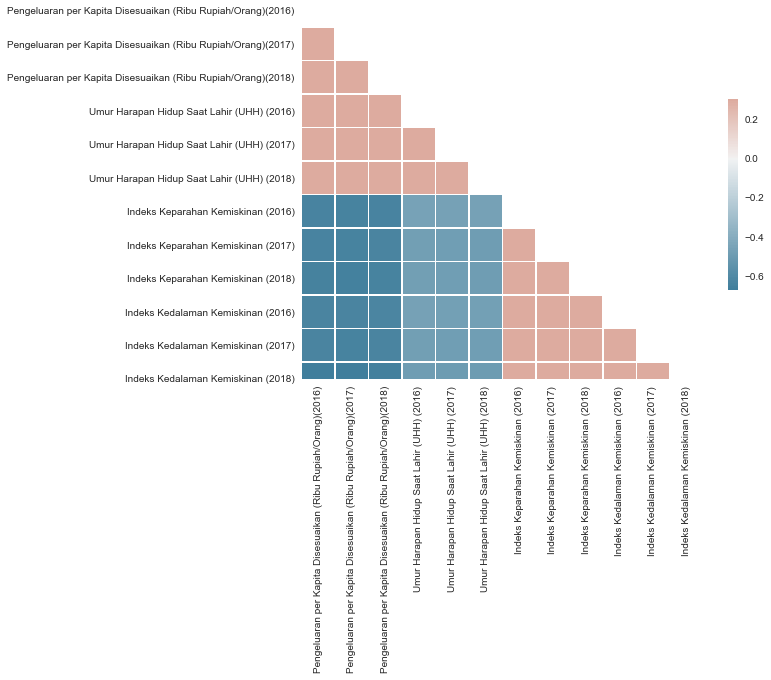

In [784]:
# Visualizing correlation analysis
corr = df[columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))  # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(9, 7))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Terlihat bahwa terdapat korelasi negatif yang cukup signifikan antara variabel Pengeluaran per Kapita dengan Indeks Keparahan Kemiskinan dan Indeks Kedalaman Kemiskinan. Tentu ini merupakan hal yang masuk akal di mana semakin besar pengeluaran (spending) umumnya menunjukkan peningkatan kekuatan ekonomi yang dimiliki. Sementara itu, terdapat korelasi yang tidak signifikan antara variabel Umur Harapan Hidup dengan variabel lainnya.

### C.2. Masa Pandemi

In [785]:
columns = ['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2021)',
           'Indeks Keparahan Kemiskinan (2019)',
           'Indeks Keparahan Kemiskinan (2020)',
           'Indeks Keparahan Kemiskinan (2021)',
           'Indeks Kedalaman Kemiskinan (2019)',
           'Indeks Kedalaman Kemiskinan (2020)',
           'Indeks Kedalaman Kemiskinan (2021)']

#### C.2.1. Analisis Kovarians

In [786]:
df[columns].cov()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Keparahan Kemiskinan (2019),Indeks Keparahan Kemiskinan (2020),Indeks Keparahan Kemiskinan (2021),Indeks Kedalaman Kemiskinan (2019),Indeks Kedalaman Kemiskinan (2020),Indeks Kedalaman Kemiskinan (2021)
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),4.899431e+06,4.828301e+06,4.890972e+06,3325.441765,3295.965223,3296.026542,-659.225223,-580.372531,-495.303030,-1969.303850,-1757.080980,-1593.480642
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),4.828301e+06,4.780279e+06,4.834930e+06,3163.725579,3135.540793,3133.536301,-650.219733,-567.530660,-482.505606,-1931.734652,-1713.563369,-1551.407291
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),4.890972e+06,4.834930e+06,4.901351e+06,3311.228200,3280.913209,3279.281355,-670.716239,-589.397843,-500.836061,-1990.038111,-1774.326239,-1604.392210
Umur Harapan Hidup Saat Lahir (UHH) (2019),3.325442e+03,3.163726e+03,3.311228e+03,6.493442,6.427318,6.398049,-0.735754,-0.720267,-0.561891,-2.146911,-2.073090,-1.742998
Umur Harapan Hidup Saat Lahir (UHH) (2020),3.295965e+03,3.135541e+03,3.280913e+03,6.427318,6.366505,6.338634,-0.733067,-0.715974,-0.559395,-2.135329,-2.058798,-1.731931
Umur Harapan Hidup Saat Lahir (UHH) (2021),3.296027e+03,3.133536e+03,3.279281e+03,6.398049,6.338634,6.313494,-0.731081,-0.713475,-0.557583,-2.130660,-2.052532,-1.727701
Indeks Keparahan Kemiskinan (2019),-6.592252e+02,-6.502197e+02,-6.707162e+02,-0.735754,-0.733067,-0.731081,0.268019,0.235895,0.203585,0.735132,0.668110,0.610058
Indeks Keparahan Kemiskinan (2020),-5.803725e+02,-5.675307e+02,-5.893978e+02,-0.720267,-0.715974,-0.713475,0.235895,0.216738,0.189552,0.656176,0.615016,0.563582
Indeks Keparahan Kemiskinan (2021),-4.953030e+02,-4.825056e+02,-5.008361e+02,-0.561891,-0.559395,-0.557583,0.203585,0.189552,0.171692,0.575036,0.544782,0.510976
Indeks Kedalaman Kemiskinan (2019),-1.969304e+03,-1.931735e+03,-1.990038e+03,-2.146911,-2.135329,-2.130660,0.735132,0.656176,0.575036,2.083116,1.913951,1.766025


#### C.2.2. Analisis Korelasi

In [787]:
df[columns].corr(method='spearman')

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Keparahan Kemiskinan (2019),Indeks Keparahan Kemiskinan (2020),Indeks Keparahan Kemiskinan (2021),Indeks Kedalaman Kemiskinan (2019),Indeks Kedalaman Kemiskinan (2020),Indeks Kedalaman Kemiskinan (2021)
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),1.000000,0.987471,0.986860,0.600611,0.605699,0.617054,-0.720214,-0.598640,-0.551165,-0.713227,-0.599939,-0.566998
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),0.987471,1.000000,0.998167,0.574637,0.577279,0.587103,-0.718074,-0.595582,-0.536492,-0.702224,-0.599175,-0.552024
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),0.986860,0.998167,1.000000,0.592055,0.594545,0.604982,-0.720367,-0.603531,-0.542300,-0.705891,-0.606051,-0.558747
Umur Harapan Hidup Saat Lahir (UHH) (2019),0.600611,0.574637,0.592055,1.000000,0.998090,0.996485,-0.475812,-0.539632,-0.405197,-0.486437,-0.487775,-0.432850
Umur Harapan Hidup Saat Lahir (UHH) (2020),0.605699,0.577279,0.594545,0.998090,1.000000,0.999159,-0.474778,-0.532029,-0.399190,-0.486780,-0.481852,-0.427840
Umur Harapan Hidup Saat Lahir (UHH) (2021),0.617054,0.587103,0.604982,0.996485,0.999159,1.000000,-0.485286,-0.541090,-0.409539,-0.498433,-0.491747,-0.438722
Indeks Keparahan Kemiskinan (2019),-0.720214,-0.718074,-0.720367,-0.475812,-0.474778,-0.485286,1.000000,0.938905,0.922554,0.989910,0.948789,0.935269
Indeks Keparahan Kemiskinan (2020),-0.598640,-0.595582,-0.603531,-0.539632,-0.532029,-0.541090,0.938905,1.000000,0.960239,0.947783,0.988992,0.965375
Indeks Keparahan Kemiskinan (2021),-0.551165,-0.536492,-0.542300,-0.405197,-0.399190,-0.409539,0.922554,0.960239,1.000000,0.937242,0.971490,0.993351
Indeks Kedalaman Kemiskinan (2019),-0.713227,-0.702224,-0.705891,-0.486437,-0.486780,-0.498433,0.989910,0.947783,0.937242,1.000000,0.963393,0.955299


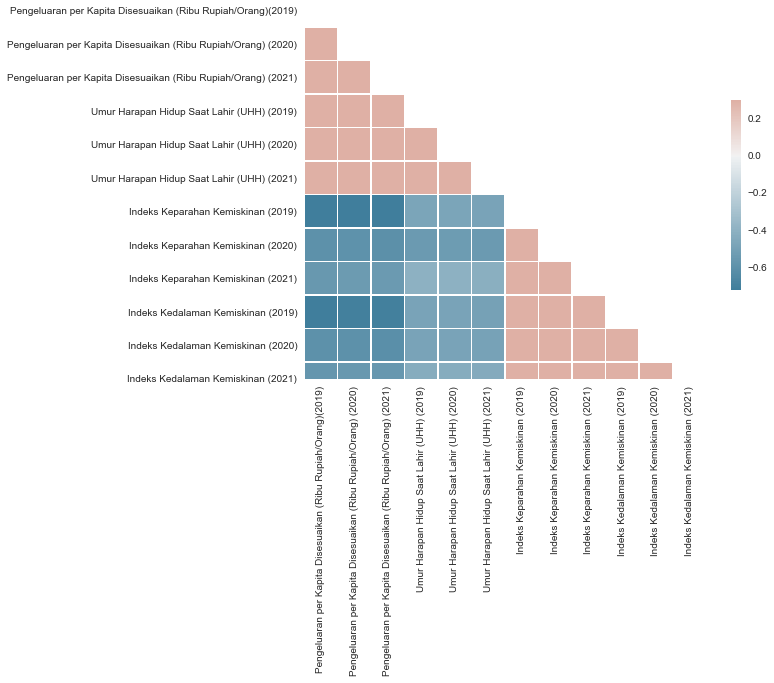

In [788]:
# Visualizing correlation analysis
corr = df[columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))  # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(9, 7))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Terlihat bahwa terjadi peningkatan korelasi negatif antara variabel Pengeluaran per Kapita dengan Indeks Keparahan Kemiskinan dan Indeks Kedalaman Kemiskinan dibandingkan dengan masa prapandemi. Hal ini menunjukkan fenomena penurunan tingkat Pengeluaran per Kapita bersamaan dengan semakin parahnya indeks kemiskinan yang terjadi di masa pandemi.

### D. Analisis Univariat Lanjutan

Pada bagian ini, dilakukan analisis univariat lanjutan setiap aspek variabel (Pengeluaran per Kapita, Umur Harapan Hidup, Keparahan Kemiskinan, & Kedalaman Kemiskinan) dengan mempertimbangkan signifikansi statistik perubahan tren yang teramati antara kondisi di masa prapandemi dengan masa pandemi.

### D.1. Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)

#### D.1.1. Visualisasi Lanjutan

In [789]:
columns = ['Provinsi',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2016)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2017)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2018)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
           'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']

# Menyusun data untuk analisis lebih lanjut
spending = df[columns]
spending.columns = ['Provinsi', 2016, 2017, 2018, 2019, 2020, 2021]
spending = spending.set_index('Provinsi')

# Mengurutkan data berdasarkan jumlah pengeluaran per kapita
spending_sorted = spending.copy()
spending_sorted['Mean'] = spending_sorted.mean(axis=1)
spending_sorted = spending_sorted.sort_values('Mean', ascending=True)
spending_sorted

,2016,2017,2018,2019,2020,2021,Mean
Provinsi,,,,,,,
PAPUA,6637.0,6996.0,7159.0,7336.0,6954.0,6955.0,7006.166667
NUSA TENGGARA TIMUR,7122.0,7350.0,7566.0,7769.0,7598.0,7554.0,7493.166667
PAPUA BARAT,7175.0,7493.0,7816.0,8125.0,8086.0,7929.0,7770.666667
MALUKU UTARA,7545.0,7792.0,7980.0,8308.0,8032.0,8140.0,7966.166667
MALUKU,8215.0,8433.0,8721.0,8887.0,8732.0,8770.0,8626.333333
KALIMANTAN BARAT,8348.0,8472.0,8860.0,9055.0,8930.0,8974.0,8773.166667
KALIMANTAN UTARA,8434.0,8643.0,8943.0,9343.0,8756.0,9075.0,8865.666667
SULAWESI BARAT,8450.0,8736.0,9051.0,9235.0,9168.0,9153.0,8965.500000
SULAWESI TENGGARA,8871.0,9094.0,9262.0,9436.0,9331.0,9381.0,9229.166667


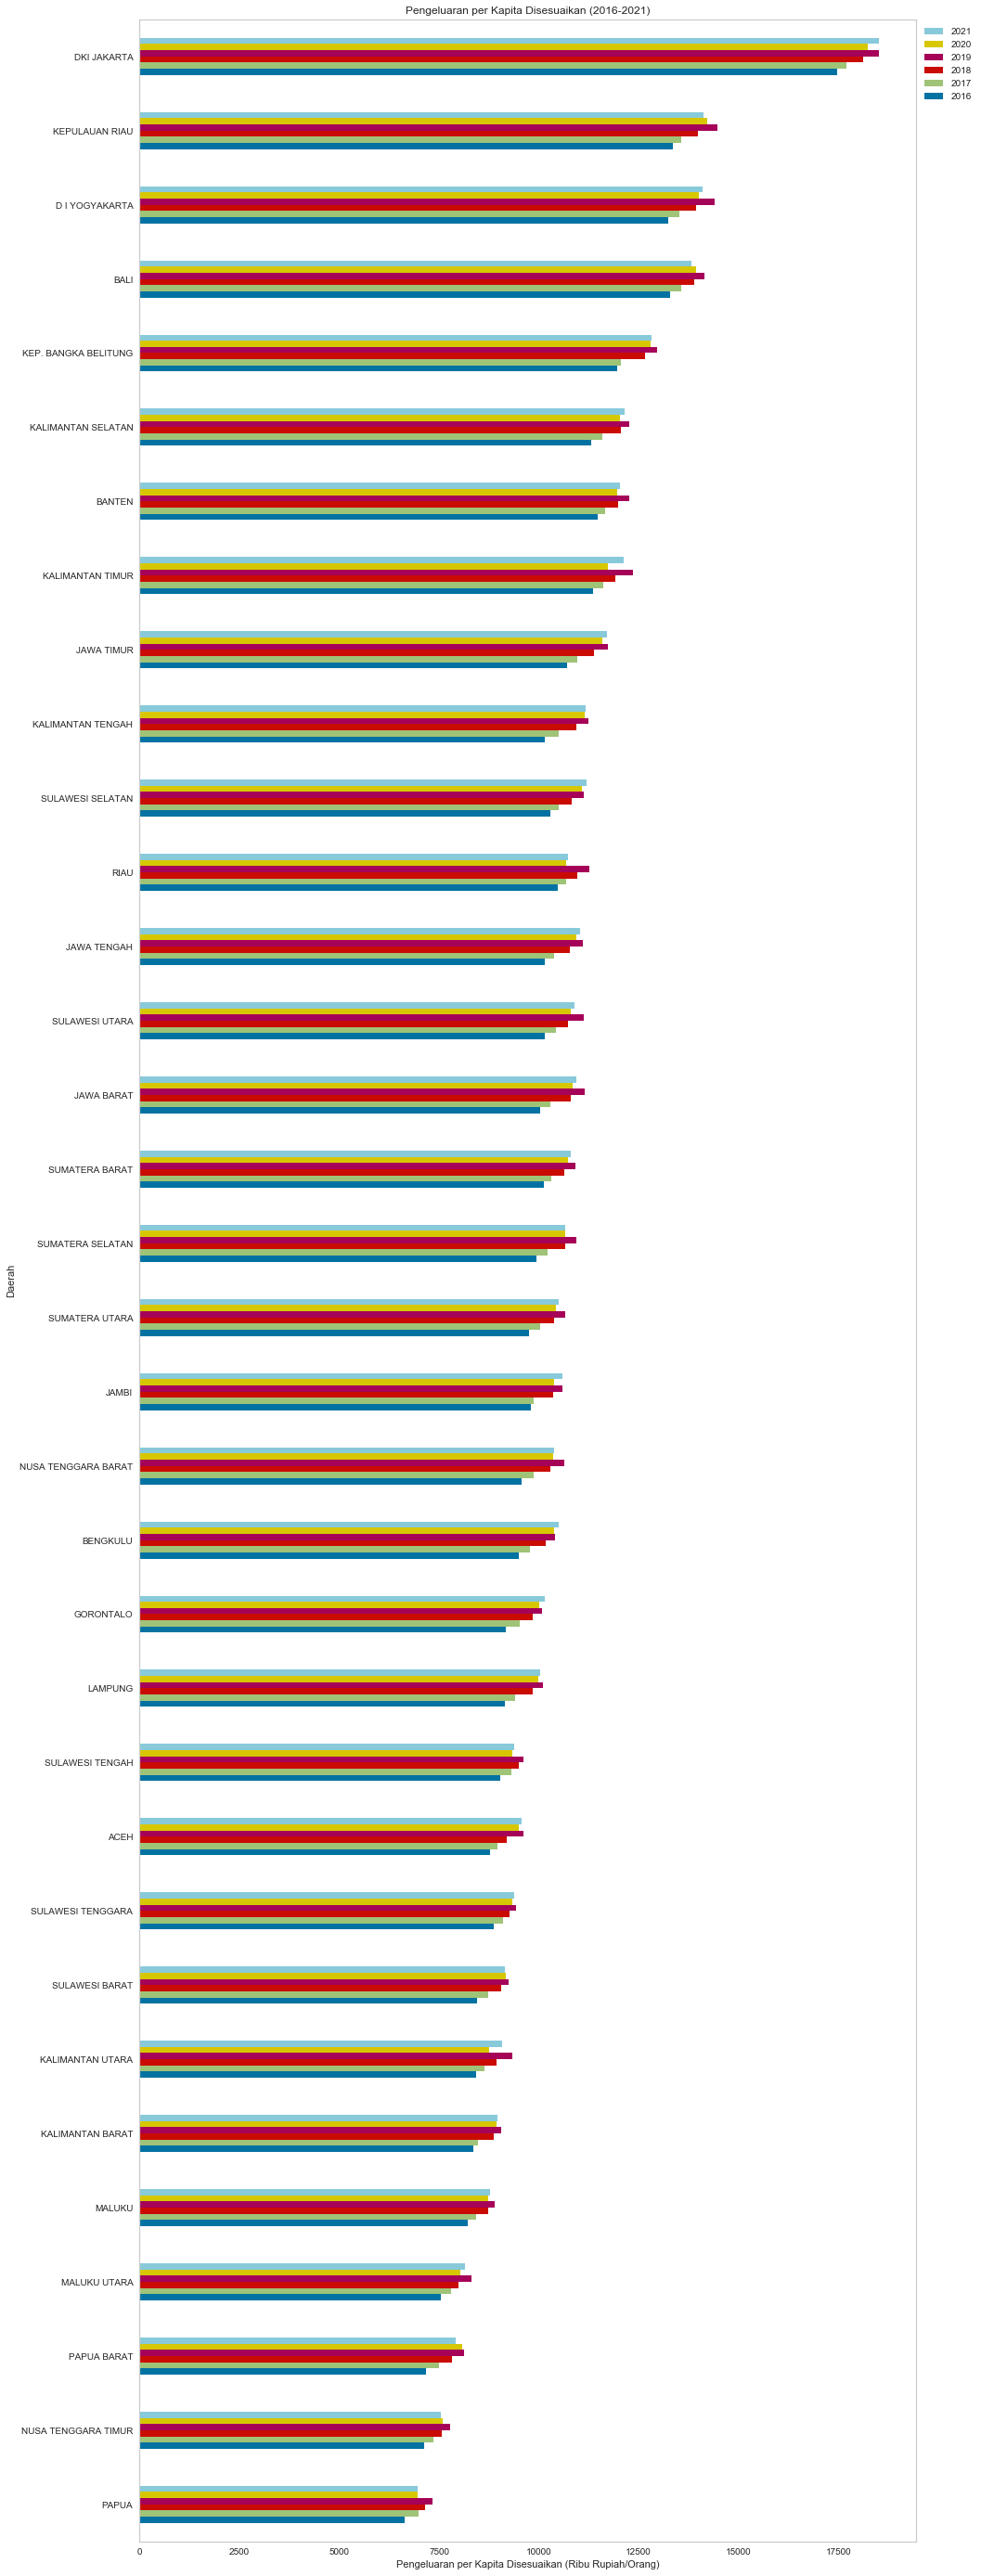

In [790]:
# Visualisasi menggunakan bar graph
fig, ax = plt.subplots(1, 1, figsize=(15, 50))
spending_sorted.iloc[:, :-1].plot(kind='barh', ax=ax)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[5], labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.title('Pengeluaran per Kapita Disesuaikan (2016-2021)')
plt.xlabel('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)')
plt.ylabel('Daerah')
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

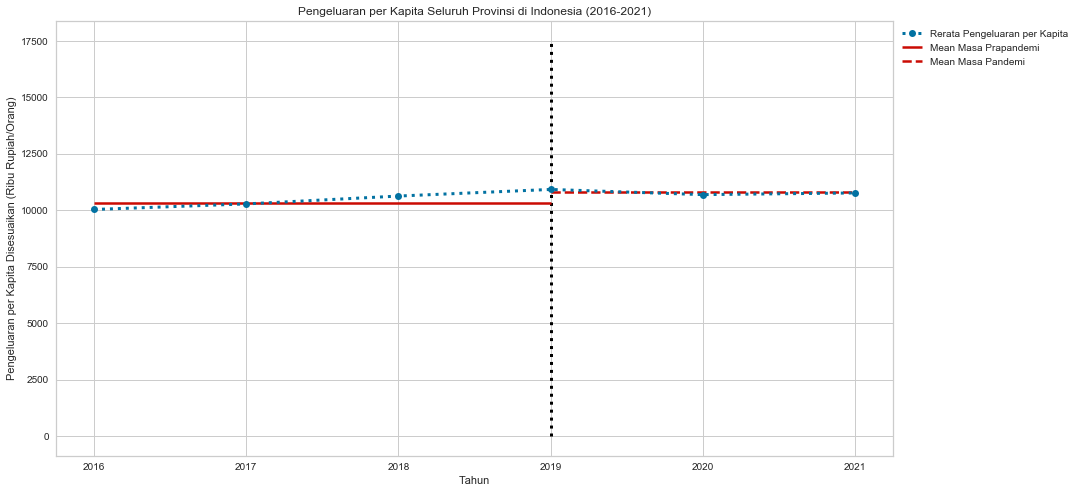

In [791]:
# Menyusun dataset untuk visualisasi menggunakan line chart
spending_pivot = spending.T
spending_pivot['Mean'] = spending_pivot.mean(axis=1)
spending_pivot

# Menentukan mean dan standar deviasi
mean_pra_pandemi = spending_pivot['Mean'][:3].mean()
std_pra_pandemi = spending_pivot['Mean'][:3].std()
mean_pandemi = spending_pivot['Mean'][3:].mean()
std_pandemi = spending_pivot['Mean'][3:].std()

# Visualisasi menggunakan line chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
spending_pivot['Mean'].plot(kind='line', marker='o', linestyle=':', linewidth=3, markersize=7, ax=ax, 
                            label='Rerata Pengeluaran per Kapita')

plt.title('Pengeluaran per Kapita Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)')
plt.xticks(np.arange(2016,2022,1))
plt.vlines(x=2019, color='black', linestyle=':', linewidth=3, ymin=0, ymax=17500)
plt.hlines(y=mean_pra_pandemi, xmin=2016, xmax=2019, colors='r', linestyles='-', linewidth=2.5, label='Mean Masa Prapandemi')
plt.hlines(y=mean_pandemi, xmin=2019, xmax=2021, colors='r', linestyles='--', linewidth=2.5, label='Mean Masa Pandemi')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [792]:
print(f'Rata-Rata Masa Prapandemi = {mean_pra_pandemi}')
print(f'Rata-Rata Masa Pandemi = {mean_pandemi}')
print(f'Standar Deviasi Masa Prapandemi = {std_pra_pandemi}')
print(f'Standar Deviasi Masa Pandemi = {std_pandemi}')

Rata-Rata Masa Prapandemi = 10308.745098039217
Rata-Rata Masa Pandemi = 10786.950980392156
Standar Deviasi Masa Prapandemi = 298.581485364611
Standar Deviasi Masa Pandemi = 117.33589856100595


#### D.1.2. Uji Hipotesis (Paired T-test)

Untuk menguji signifikansi perbedaan mean yang terjadi antara masa prapandemi dengan masa pandemi, akan digunakan uji statistik inferensial Paired T-test. Paired T-Test merupakan uji parametrik yang dapat digunakan pada dua data berpasangan yang bertujuan dari uji ini adalah untuk melihat apakah ada perbedaan rata-rata antara dua sampel yang saling berpasangan atau berhubungan. Uji ini memiliki asumsi bahwa selisih (differences) kedua sampel berdistribusi normal/Gaussian.

Oleh karena itu, akan dilakukan uji normalitas terlebih dahulu untuk melihat pemenuhan asumsi Paired T-test dengan menggunakan uji Shapiro-Wilk. Untuk uji Shapiro-Wil, digunakan hipotesis sebagai berikut:

- Hipotesis Awal (H0): Data berdistribusi normal.
- Hipotesis Kerja (H1): Data tidak berdistribusi normal.

In [793]:
# Menyusun data untuk analisis uji statistik inferensial
data_pra_pandemi = spending.iloc[:, :-3].values.flatten()
data_pandemi = spending.iloc[:, -3:].values.flatten()
differences = abs(data_pra_pandemi - data_pandemi)

# Uji normalitas
stat, p = shapiro(differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.938, p=0.000
Data tidak berdistribusi normal


Karena tidak berdistribusi normal, akan digunakan transformasi Box-Cox untuk mengurangi skewness pada data dan dapat memenuhi asumsi Paired T-test.

In [794]:
# Transformasi box-cox
trans_data_pra_pandemi = boxcox(spending.iloc[:, :-3].values.flatten())[0]
trans_data_pandemi = boxcox(spending.iloc[:, -3:].values.flatten())[0]
trans_differences = abs(trans_data_pra_pandemi - trans_data_pandemi)

# Uji normalitas
stat, p = shapiro(trans_differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.984, p=0.243
Data berdistribusi normal


Diperoleh bahwa asumsi normalitas telah dipenuhi. Kemudian, dilakukan uji Paired T-test untuk menguji signifikansi perbedaan mean kedua sampel. Hipotesis dalam analisis perbandingan ini, yaitu:
    
- Hipotesis Awal (H0): Tidak ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.
- Hipotesis Kerja (H1): Ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.

In [795]:
# Analisis statistik inferensial Paired T-test     
stat, p = ttest_rel(trans_data_pra_pandemi, trans_data_pandemi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) masih diterima')
else:
    print('Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak')

stat=-5472.912, p=0.000
Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak


Dengan demikian, dapat dikatakan bahwa perbedaan mean antara masa prapandemi dan masa pandemi signifikan secara statistik. 

### D.2. Umur Harapan Hidup (UHH)

#### D.2.1. Visualisasi Lanjutan

In [796]:
columns = ['Provinsi',
           'Umur Harapan Hidup Saat Lahir (UHH) (2016)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2017)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2018)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
           'Umur Harapan Hidup Saat Lahir (UHH) (2021)']

# Menyusun data untuk analisis lebih lanjut
spending = df[columns]
spending.columns = ['Provinsi', 2016, 2017, 2018, 2019, 2020, 2021]
spending = spending.set_index('Provinsi')

# Mengurutkan data berdasarkan jumlah pengeluaran per kapita
spending_sorted = spending.copy()
spending_sorted['Mean'] = spending_sorted.mean(axis=1)
spending_sorted = spending_sorted.sort_values('Mean', ascending=True)
spending_sorted

,2016,2017,2018,2019,2020,2021,Mean
Provinsi,,,,,,,
SULAWESI BARAT,64.31,64.34,64.58,64.82,65.06,65.25,64.726667
PAPUA,65.12,65.14,65.36,65.65,65.79,65.93,65.498333
MALUKU,65.35,65.40,65.59,65.82,65.98,66.09,65.705000
PAPUA BARAT,65.30,65.32,65.55,65.90,66.02,66.14,65.705000
NUSA TENGGARA BARAT,65.48,65.55,65.87,66.28,66.51,66.69,66.063333
NUSA TENGGARA TIMUR,66.04,66.07,66.38,66.85,67.01,67.15,66.583333
GORONTALO,67.13,67.14,67.45,67.93,68.07,68.19,67.651667
MALUKU UTARA,67.51,67.54,67.80,68.18,68.33,68.45,67.968333
SULAWESI TENGAH,67.31,67.32,67.78,68.23,68.69,68.83,68.026667


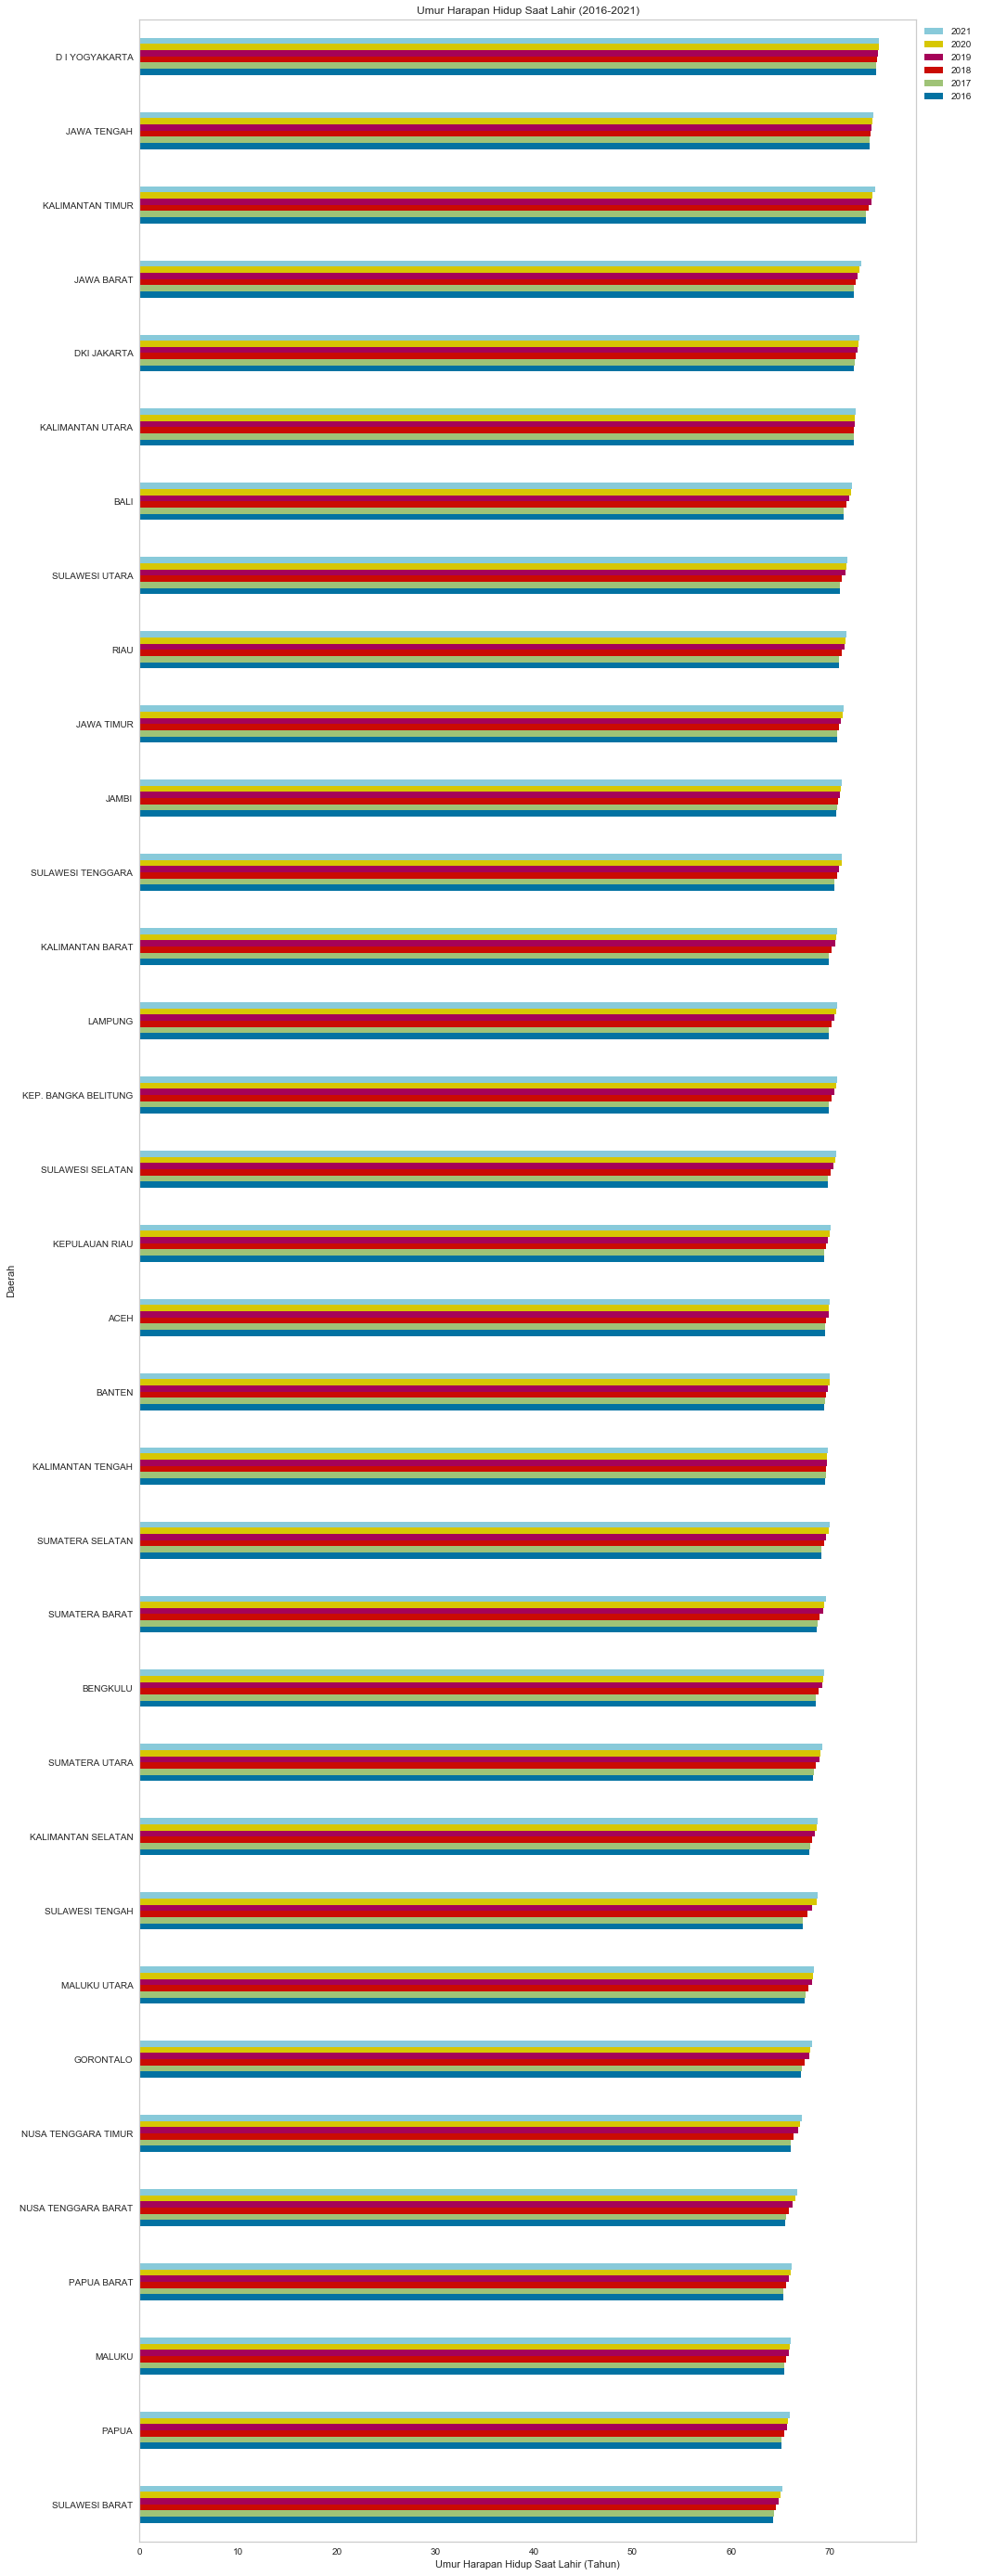

In [797]:
# Visualisasi menggunakan bar graph
fig, ax = plt.subplots(1, 1, figsize=(15, 50))
spending_sorted.iloc[:, :-1].plot(kind='barh', ax=ax)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[5], labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.title('Umur Harapan Hidup Saat Lahir (2016-2021)')
plt.xlabel('Umur Harapan Hidup Saat Lahir (Tahun)')
plt.ylabel('Daerah')
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

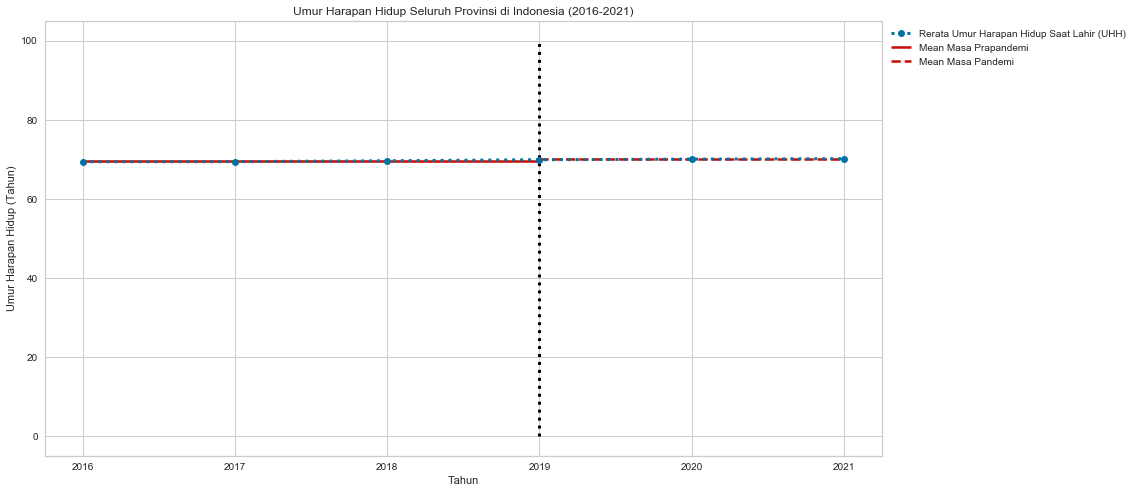

In [798]:
# Menyusun dataset untuk visualisasi menggunakan line chart
spending_pivot = spending.T
spending_pivot['Mean'] = spending_pivot.mean(axis=1)
spending_pivot

# Menentukan mean dan standar deviasi
mean_pra_pandemi = spending_pivot['Mean'][:3].mean()
std_pra_pandemi = spending_pivot['Mean'][:3].std()
mean_pandemi = spending_pivot['Mean'][3:].mean()
std_pandemi = spending_pivot['Mean'][3:].std()

# Visualisasi menggunakan line chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
spending_pivot['Mean'].plot(kind='line', marker='o', linestyle=':', linewidth=3, markersize=7, ax=ax, 
                            label='Rerata Umur Harapan Hidup Saat Lahir (UHH)')

plt.title('Umur Harapan Hidup Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Umur Harapan Hidup (Tahun)')
plt.xticks(np.arange(2016,2022,1))
plt.vlines(x=2019, color='black', linestyle=':', linewidth=3, ymin=0, ymax=100)
plt.hlines(y=mean_pra_pandemi, xmin=2016, xmax=2019, colors='r', linestyles='-', linewidth=2.5, label='Mean Masa Prapandemi')
plt.hlines(y=mean_pandemi, xmin=2019, xmax=2021, colors='r', linestyles='--', linewidth=2.5, label='Mean Masa Pandemi')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [799]:
print(f'Rata-Rata Masa Prapandemi = {mean_pra_pandemi}')
print(f'Rata-Rata Masa Pandemi = {mean_pandemi}')
print(f'Standar Deviasi Masa Prapandemi = {std_pra_pandemi}')
print(f'Standar Deviasi Masa Pandemi = {std_pandemi}')

Rata-Rata Masa Prapandemi = 69.47127450980393
Rata-Rata Masa Pandemi = 70.0270588235294
Standar Deviasi Masa Prapandemi = 0.1313834865215773
Standar Deviasi Masa Pandemi = 0.13011074601420347


#### D.2.2. Uji Hipotesis (Paired T-test)

Untuk menguji signifikansi perbedaan mean yang terjadi antara masa prapandemi dengan masa pandemi, akan digunakan uji statistik inferensial Paired T-test. Paired T-Test merupakan uji parametrik yang dapat digunakan pada dua data berpasangan yang bertujuan dari uji ini adalah untuk melihat apakah ada perbedaan rata-rata antara dua sampel yang saling berpasangan atau berhubungan. Uji ini memiliki asumsi bahwa selisih (differences) kedua sampel berdistribusi normal/Gaussian.

Oleh karena itu, akan dilakukan uji normalitas terlebih dahulu untuk melihat pemenuhan asumsi Paired T-test dengan menggunakan uji Shapiro-Wilk. Untuk uji Shapiro-Wil, digunakan hipotesis sebagai berikut:

- Hipotesis Awal (H0): Data berdistribusi normal.
- Hipotesis Kerja (H1): Data tidak berdistribusi normal.

In [800]:
# Menyusun data untuk analisis uji statistik inferensial
data_pra_pandemi = spending.iloc[:, :-3].values.flatten()
data_pandemi = spending.iloc[:, -3:].values.flatten()
differences = abs(data_pra_pandemi - data_pandemi)

# Uji normalitas
stat, p = shapiro(differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.968, p=0.013
Data tidak berdistribusi normal


Karena tidak berdistribusi normal, akan digunakan transformasi Box-Cox untuk mengurangi skewness pada data dan dapat memenuhi asumsi Paired T-test.

In [801]:
# Transformasi box-cox
trans_data_pra_pandemi = boxcox(spending.iloc[:, :-3].values.flatten())[0]
trans_data_pandemi = boxcox(spending.iloc[:, -3:].values.flatten())[0]
trans_differences = abs(trans_data_pra_pandemi - trans_data_pandemi)

# Uji normalitas
stat, p = shapiro(trans_differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.976, p=0.065
Data berdistribusi normal


Diperoleh bahwa asumsi normalitas telah dipenuhi. Kemudian, dilakukan uji Paired T-test untuk menguji signifikansi perbedaan mean kedua sampel. Hipotesis dalam analisis perbandingan ini, yaitu:
    
- Hipotesis Awal (H0): Tidak ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.
- Hipotesis Kerja (H1): Ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.

In [802]:
# Analisis statistik inferensial Paired T-test     
stat, p = ttest_rel(trans_data_pra_pandemi, trans_data_pandemi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) masih diterima')
else:
    print('Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak')

stat=-139.165, p=0.000
Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak


Dengan demikian, dapat dikatakan bahwa perbedaan mean antara masa prapandemi dan masa pandemi signifikan secara statistik. 

### D.3. Indeks Keparahan Kemiskinan

#### D.3.1. Visualisasi Lanjutan

In [803]:
columns = ['Provinsi',
           'Indeks Keparahan Kemiskinan (2016)',
           'Indeks Keparahan Kemiskinan (2017)',
           'Indeks Keparahan Kemiskinan (2018)',
           'Indeks Keparahan Kemiskinan (2019)',
           'Indeks Keparahan Kemiskinan (2020)',
           'Indeks Keparahan Kemiskinan (2021)']

# Menyusun data untuk analisis lebih lanjut
spending = df[columns]
spending.columns = ['Provinsi', 2016, 2017, 2018, 2019, 2020, 2021]
spending = spending.set_index('Provinsi')

# Mengurutkan data berdasarkan jumlah pengeluaran per kapita
spending_sorted = spending.copy()
spending_sorted['Mean'] = spending_sorted.mean(axis=1)
spending_sorted = spending_sorted.sort_values('Mean', ascending=True)
spending_sorted

,2016,2017,2018,2019,2020,2021,Mean
Provinsi,,,,,,,
DKI JAKARTA,0.08,0.10,0.11,0.11,0.11,0.14,0.108333
KEP. BANGKA BELITUNG,0.15,0.08,0.14,0.10,0.13,0.11,0.118333
BALI,0.09,0.16,0.18,0.11,0.10,0.15,0.131667
KALIMANTAN SELATAN,0.16,0.16,0.16,0.15,0.16,0.13,0.153333
KALIMANTAN TENGAH,0.20,0.21,0.21,0.14,0.20,0.15,0.185000
MALUKU UTARA,0.18,0.20,0.19,0.20,0.21,0.21,0.198333
BANTEN,0.17,0.19,0.20,0.18,0.23,0.26,0.205000
SUMATERA BARAT,0.24,0.23,0.24,0.21,0.20,0.24,0.226667
KEPULAUAN RIAU,0.20,0.23,0.24,0.12,0.29,0.28,0.226667


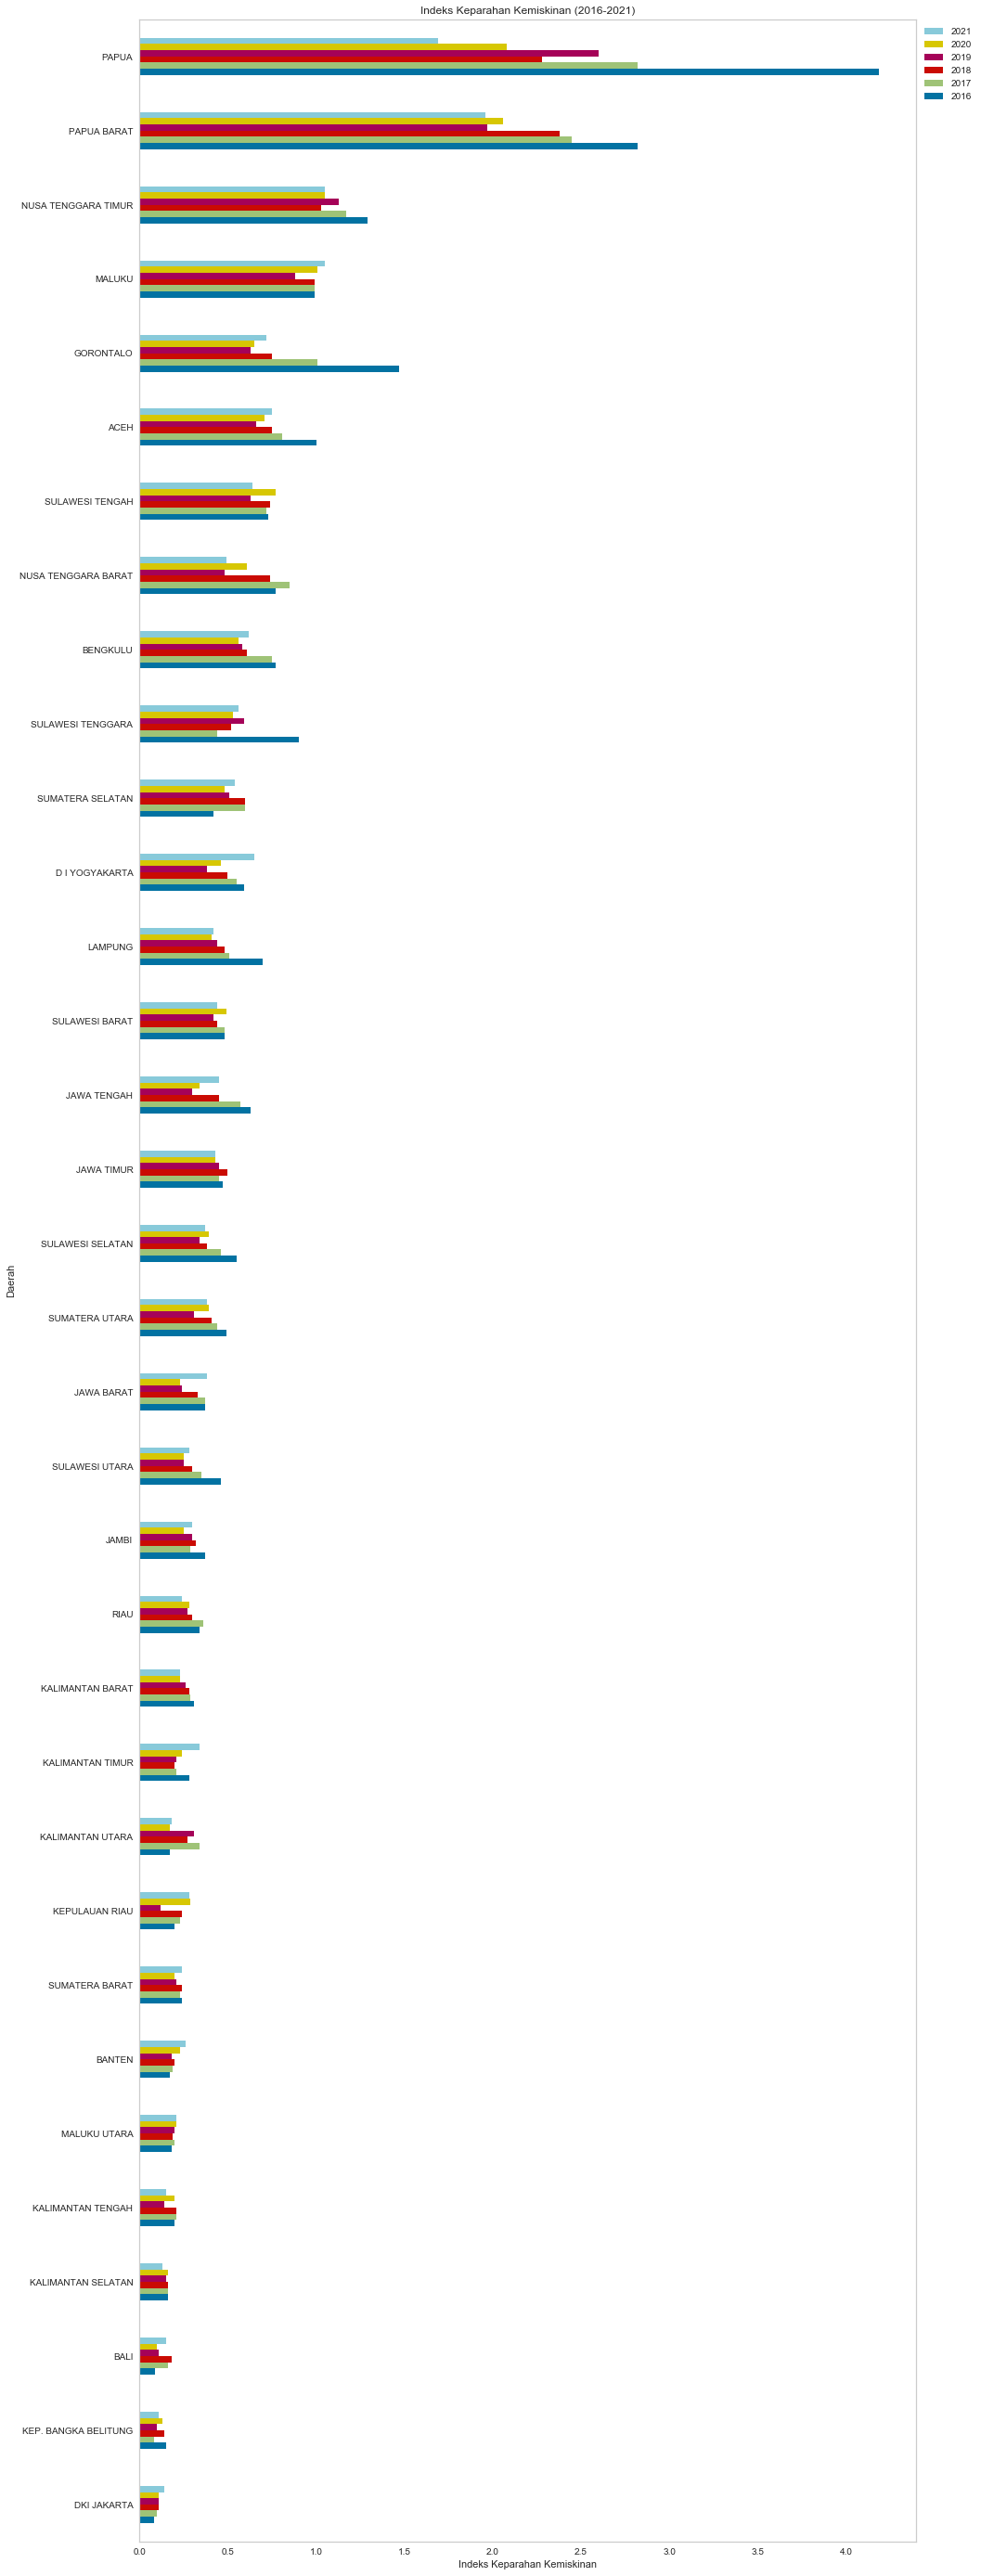

In [804]:
# Visualisasi menggunakan bar graph
fig, ax = plt.subplots(1, 1, figsize=(15, 50))
spending_sorted.iloc[:, :-1].plot(kind='barh', ax=ax)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[5], labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.title('Indeks Keparahan Kemiskinan (2016-2021)')
plt.xlabel('Indeks Keparahan Kemiskinan')
plt.ylabel('Daerah')
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

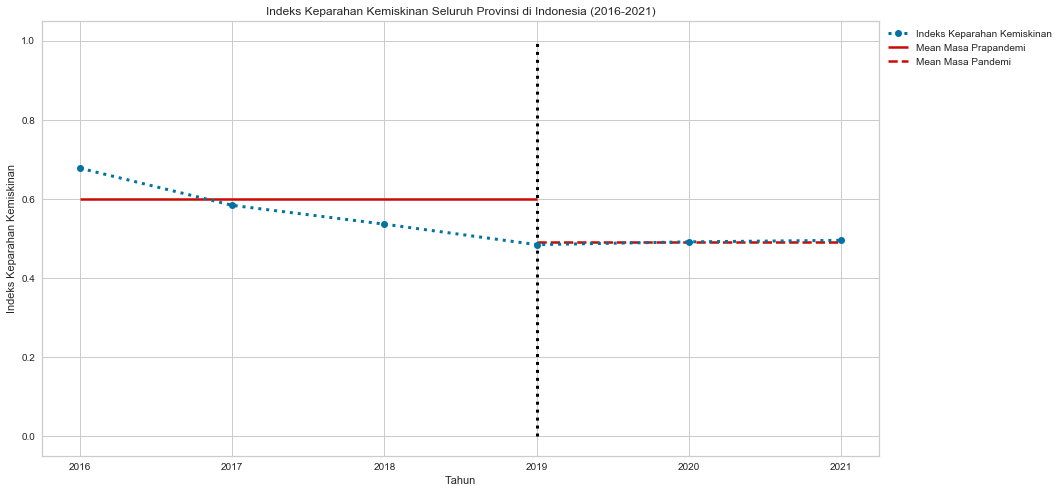

In [805]:
# Menyusun dataset untuk visualisasi menggunakan line chart
spending_pivot = spending.T
spending_pivot['Mean'] = spending_pivot.mean(axis=1)
spending_pivot

# Menentukan mean dan standar deviasi
mean_pra_pandemi = spending_pivot['Mean'][:3].mean()
std_pra_pandemi = spending_pivot['Mean'][:3].std()
mean_pandemi = spending_pivot['Mean'][3:].mean()
std_pandemi = spending_pivot['Mean'][3:].std()

# Visualisasi menggunakan line chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
spending_pivot['Mean'].plot(kind='line', marker='o', linestyle=':', linewidth=3, markersize=7, ax=ax, 
                            label='Indeks Keparahan Kemiskinan')

plt.title('Indeks Keparahan Kemiskinan Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Indeks Keparahan Kemiskinan')
plt.xticks(np.arange(2016,2022,1))
plt.vlines(x=2019, color='black', linestyle=':', linewidth=3, ymin=0, ymax=1)
plt.hlines(y=mean_pra_pandemi, xmin=2016, xmax=2019, colors='r', linestyles='-', linewidth=2.5, label='Mean Masa Prapandemi')
plt.hlines(y=mean_pandemi, xmin=2019, xmax=2021, colors='r', linestyles='--', linewidth=2.5, label='Mean Masa Pandemi')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [806]:
print(f'Rata-Rata Masa Prapandemi = {mean_pra_pandemi}')
print(f'Rata-Rata Masa Pandemi = {mean_pandemi}')
print(f'Standar Deviasi Masa Prapandemi = {std_pra_pandemi}')
print(f'Standar Deviasi Masa Pandemi = {std_pandemi}')

Rata-Rata Masa Prapandemi = 0.5989215686274509
Rata-Rata Masa Pandemi = 0.49009803921568634
Standar Deviasi Masa Prapandemi = 0.0719803494266008
Standar Deviasi Masa Pandemi = 0.005520748323647498


#### D.3.2. Uji Hipotesis (Paired T-test)

Untuk menguji signifikansi perbedaan mean yang terjadi antara masa prapandemi dengan masa pandemi, akan digunakan uji statistik inferensial Paired T-test. Paired T-Test merupakan uji parametrik yang dapat digunakan pada dua data berpasangan yang bertujuan dari uji ini adalah untuk melihat apakah ada perbedaan rata-rata antara dua sampel yang saling berpasangan atau berhubungan. Uji ini memiliki asumsi bahwa selisih (differences) kedua sampel berdistribusi normal/Gaussian.

Oleh karena itu, akan dilakukan uji normalitas terlebih dahulu untuk melihat pemenuhan asumsi Paired T-test dengan menggunakan uji Shapiro-Wilk. Untuk uji Shapiro-Wil, digunakan hipotesis sebagai berikut:

- Hipotesis Awal (H0): Data berdistribusi normal.
- Hipotesis Kerja (H1): Data tidak berdistribusi normal.

In [807]:
# Menyusun data untuk analisis uji statistik inferensial
data_pra_pandemi = spending.iloc[:, :-3].values.flatten()
data_pandemi = spending.iloc[:, -3:].values.flatten()
differences = abs(data_pra_pandemi - data_pandemi)

# Uji normalitas
stat, p = shapiro(differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.554, p=0.000
Data tidak berdistribusi normal


Karena tidak berdistribusi normal, akan digunakan transformasi data untuk mengurangi skewness pada data dan dapat memenuhi asumsi Paired T-test.

In [808]:
# Transformasi box-cox
trans_data_pra_pandemi = (spending.iloc[:, :-3].values.flatten())**0.3
trans_data_pandemi = (spending.iloc[:, -3:].values.flatten())**0.5
trans_differences = abs(trans_data_pra_pandemi - trans_data_pandemi)

# Uji normalitas
stat, p = shapiro(trans_differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.983, p=0.199
Data berdistribusi normal


Diperoleh bahwa asumsi normalitas telah dipenuhi. Kemudian, dilakukan uji Paired T-test untuk menguji signifikansi perbedaan mean kedua sampel. Hipotesis dalam analisis perbandingan ini, yaitu:
    
- Hipotesis Awal (H0): Tidak ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.
- Hipotesis Kerja (H1): Ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.

In [809]:
# Analisis statistik inferensial Paired T-test     
stat, p = ttest_rel(trans_data_pra_pandemi, trans_data_pandemi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) masih diterima')
else:
    print('Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak')

stat=15.845, p=0.000
Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak


Dengan demikian, dapat dikatakan bahwa perbedaan mean antara masa prapandemi dan masa pandemi signifikan secara statistik. 

### D.4. Indeks Kedalaman Kemiskinan

#### D.4.1. Visualisasi Lanjutan

In [810]:
columns = ['Provinsi',
           'Indeks Kedalaman Kemiskinan (2016)',
           'Indeks Kedalaman Kemiskinan (2017)',
           'Indeks Kedalaman Kemiskinan (2018)',
           'Indeks Kedalaman Kemiskinan (2019)',
           'Indeks Kedalaman Kemiskinan (2020)',
           'Indeks Kedalaman Kemiskinan (2021)']

# Menyusun data untuk analisis lebih lanjut
spending = df[columns]
spending.columns = ['Provinsi', 2016, 2017, 2018, 2019, 2020, 2021]
spending = spending.set_index('Provinsi')

# Mengurutkan data berdasarkan jumlah pengeluaran per kapita
spending_sorted = spending.copy()
spending_sorted['Mean'] = spending_sorted.mean(axis=1)
spending_sorted = spending_sorted.sort_values('Mean', ascending=True)
spending_sorted

,2016,2017,2018,2019,2020,2021,Mean
Provinsi,,,,,,,
DKI JAKARTA,0.46,0.49,0.51,0.50,0.59,0.64,0.531667
KEP. BANGKA BELITUNG,0.67,0.49,0.68,0.51,0.60,0.61,0.593333
BALI,0.51,0.68,0.68,0.53,0.52,0.68,0.600000
KALIMANTAN SELATAN,0.71,0.72,0.69,0.70,0.70,0.67,0.698333
KALIMANTAN TENGAH,0.86,0.84,0.81,0.70,0.80,0.71,0.786667
MALUKU UTARA,0.73,0.81,0.89,0.89,0.94,0.97,0.871667
BANTEN,0.80,0.86,0.82,0.76,1.00,1.09,0.888333
KEPULAUAN RIAU,0.89,0.97,1.00,0.69,1.11,1.07,0.955000
KALIMANTAN TIMUR,1.04,0.89,0.85,0.91,1.02,1.22,0.988333


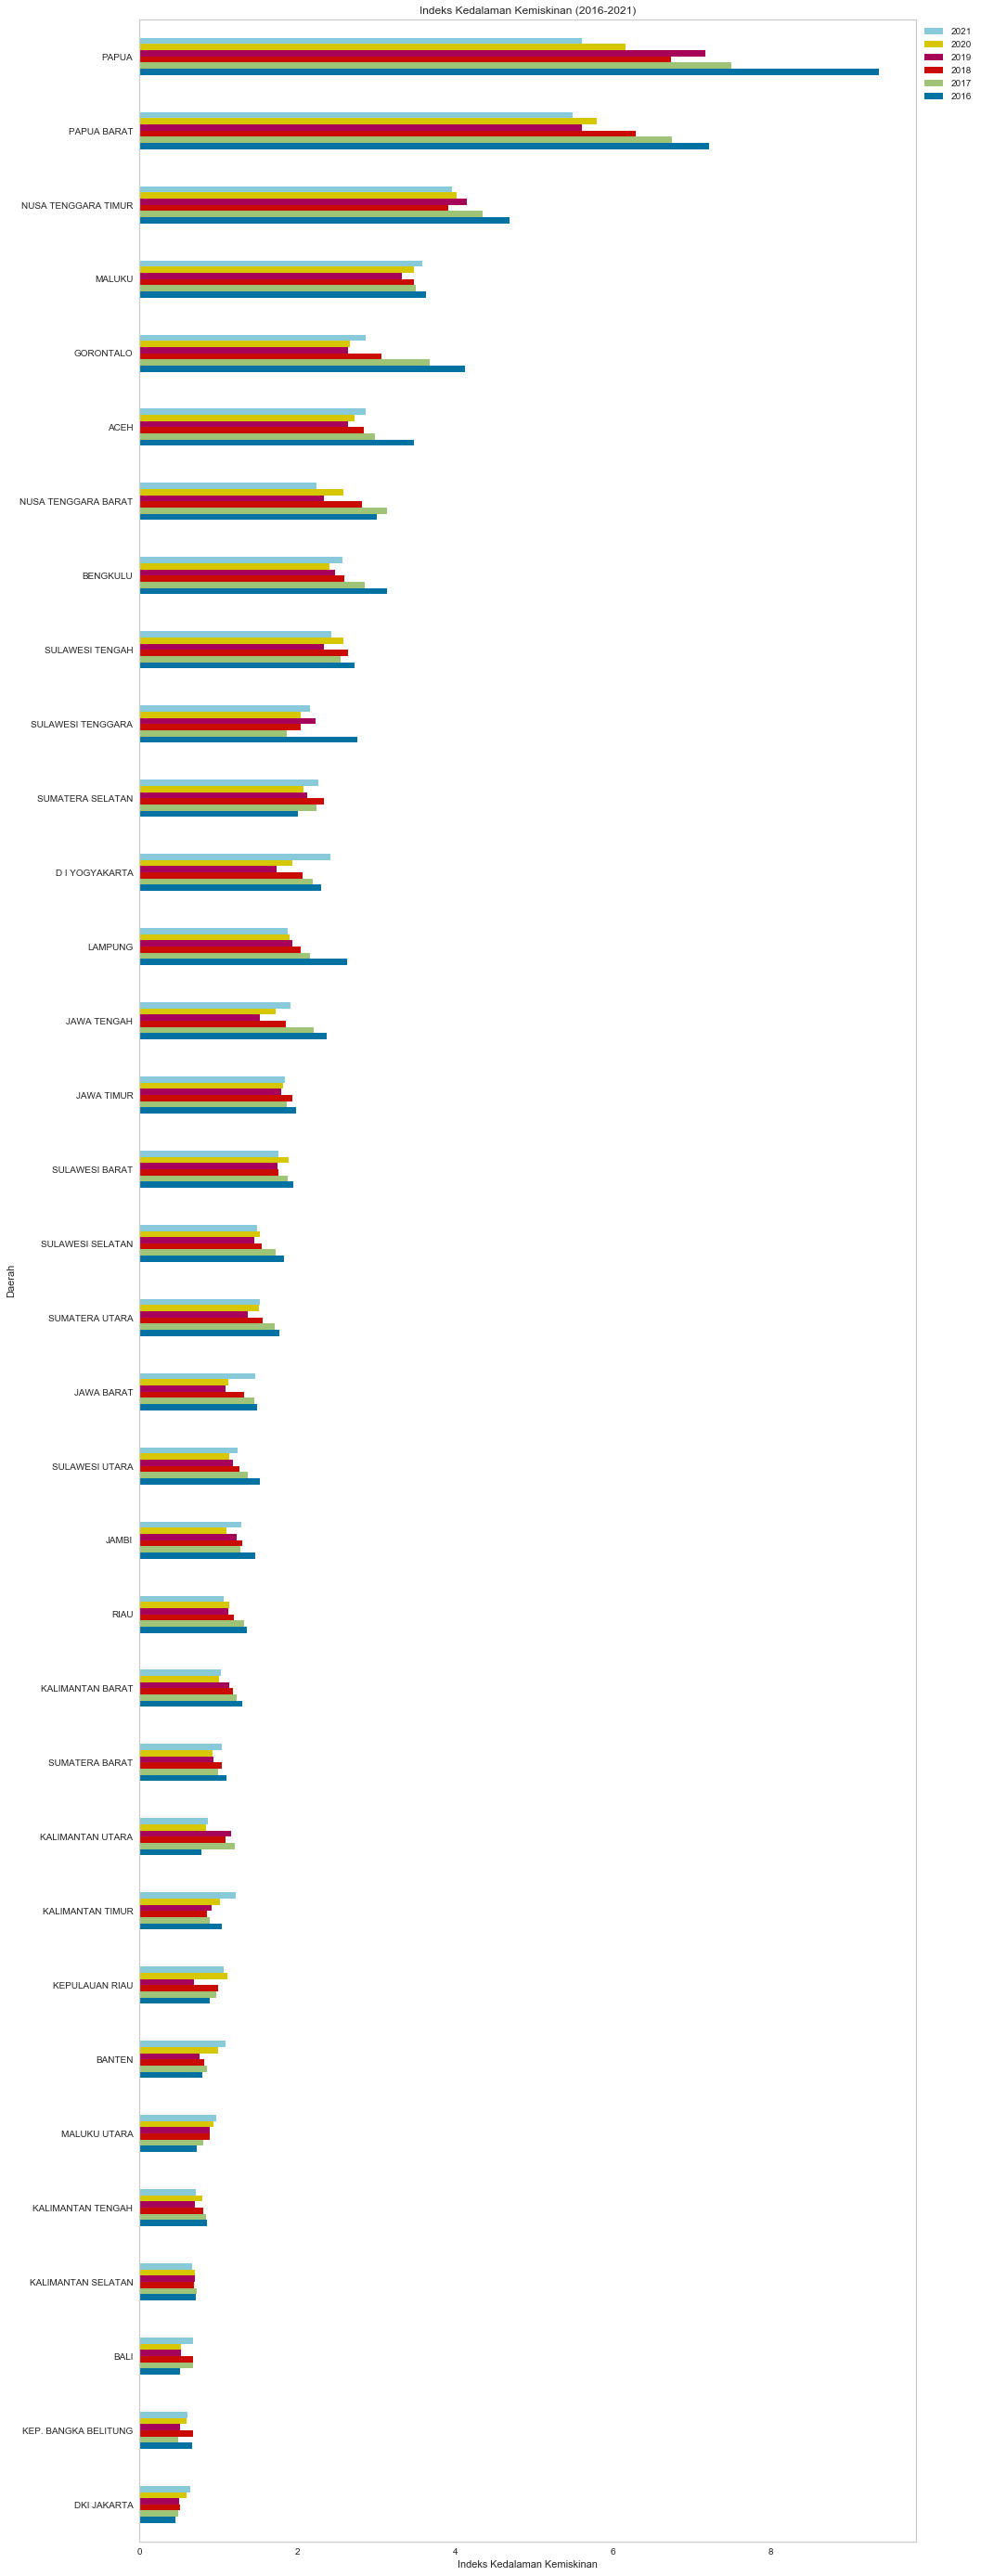

In [811]:
# Visualisasi menggunakan bar graph
fig, ax = plt.subplots(1, 1, figsize=(15, 50))
spending_sorted.iloc[:, :-1].plot(kind='barh', ax=ax)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[5], labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.title('Indeks Kedalaman Kemiskinan (2016-2021)')
plt.xlabel('Indeks Kedalaman Kemiskinan')
plt.ylabel('Daerah')
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

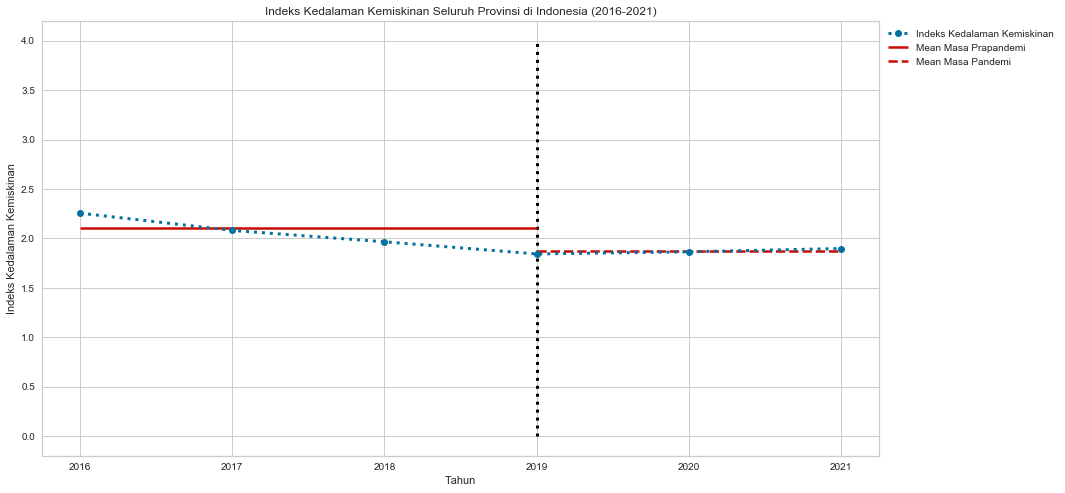

In [812]:
# Menyusun dataset untuk visualisasi menggunakan line chart
spending_pivot = spending.T
spending_pivot['Mean'] = spending_pivot.mean(axis=1)
spending_pivot

# Menentukan mean dan standar deviasi
mean_pra_pandemi = spending_pivot['Mean'][:3].mean()
std_pra_pandemi = spending_pivot['Mean'][:3].std()
mean_pandemi = spending_pivot['Mean'][3:].mean()
std_pandemi = spending_pivot['Mean'][3:].std()

# Visualisasi menggunakan line chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
spending_pivot['Mean'].plot(kind='line', marker='o', linestyle=':', linewidth=3, markersize=7, ax=ax, 
                            label='Indeks Kedalaman Kemiskinan')

plt.title('Indeks Kedalaman Kemiskinan Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Indeks Kedalaman Kemiskinan')
plt.xticks(np.arange(2016,2022,1))
plt.vlines(x=2019, color='black', linestyle=':', linewidth=3, ymin=0, ymax=4)
plt.hlines(y=mean_pra_pandemi, xmin=2016, xmax=2019, colors='r', linestyles='-', linewidth=2.5, label='Mean Masa Prapandemi')
plt.hlines(y=mean_pandemi, xmin=2019, xmax=2021, colors='r', linestyles='--', linewidth=2.5, label='Mean Masa Pandemi')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [813]:
print(f'Rata-Rata Masa Prapandemi = {mean_pra_pandemi}')
print(f'Rata-Rata Masa Pandemi = {mean_pandemi}')
print(f'Standar Deviasi Masa Prapandemi = {std_pra_pandemi}')
print(f'Standar Deviasi Masa Pandemi = {std_pandemi}')

Rata-Rata Masa Prapandemi = 2.1000980392156863
Rata-Rata Masa Pandemi = 1.867843137254902
Standar Deviasi Masa Prapandemi = 0.14571869773527843
Standar Deviasi Masa Pandemi = 0.02754256431242853


#### D.4.2. Uji Hipotesis (Paired T-test)

Untuk menguji signifikansi perbedaan mean yang terjadi antara masa prapandemi dengan masa pandemi, akan digunakan uji statistik inferensial Paired T-test. Paired T-Test merupakan uji parametrik yang dapat digunakan pada dua data berpasangan yang bertujuan dari uji ini adalah untuk melihat apakah ada perbedaan rata-rata antara dua sampel yang saling berpasangan atau berhubungan. Uji ini memiliki asumsi bahwa selisih (differences) kedua sampel berdistribusi normal/Gaussian.

Oleh karena itu, akan dilakukan uji normalitas terlebih dahulu untuk melihat pemenuhan asumsi Paired T-test dengan menggunakan uji Shapiro-Wilk. Untuk uji Shapiro-Wil, digunakan hipotesis sebagai berikut:

- Hipotesis Awal (H0): Data berdistribusi normal.
- Hipotesis Kerja (H1): Data tidak berdistribusi normal.

In [814]:
# Menyusun data untuk analisis uji statistik inferensial
data_pra_pandemi = spending.iloc[:, :-3].values.flatten()
data_pandemi = spending.iloc[:, -3:].values.flatten()
differences = abs(data_pra_pandemi - data_pandemi)

# Uji normalitas
stat, p = shapiro(differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.707, p=0.000
Data tidak berdistribusi normal


Karena tidak berdistribusi normal, akan digunakan transformasi Yeo-Johnson untuk mengurangi skewness pada data dan dapat memenuhi asumsi Paired T-test.

In [815]:
# Transformasi box-cox
trans_data_pra_pandemi = yeojohnson(spending.iloc[:, :-3].values.flatten())[0]
trans_data_pandemi = yeojohnson(spending.iloc[:, -3:].values.flatten())[0]
trans_differences = abs(trans_data_pra_pandemi - trans_data_pandemi)

# Uji normalitas
stat, p = shapiro(trans_differences)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data berdistribusi normal')
else:
    print('Data tidak berdistribusi normal')

stat=0.981, p=0.152
Data berdistribusi normal


Diperoleh bahwa asumsi normalitas telah dipenuhi. Kemudian, dilakukan uji Paired T-test untuk menguji signifikansi perbedaan mean kedua sampel. Hipotesis dalam analisis perbandingan ini, yaitu:
    
- Hipotesis Awal (H0): Tidak ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.
- Hipotesis Kerja (H1): Ada perbedaan signifikan antara mean masa prapandemi dengan mean masa pandemi.

In [816]:
# Analisis statistik inferensial Paired T-test     
stat, p = ttest_rel(trans_data_pra_pandemi, trans_data_pandemi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) masih diterima')
else:
    print('Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak')

stat=11.655, p=0.000
Ada perbedaan mean yang signifikan sehingga hipotesis awal (H0) dapat ditolak


Dengan demikian, dapat dikatakan bahwa perbedaan mean antara masa prapandemi dan masa pandemi signifikan secara statistik. 

### E. Hasil Analisis

#### E.1. Pengeluaran per Kapita (Ribu Rupiah/Orang)

Dari analisis statistik dasar, diperoleh bahwa terjadi pada masa prapandemi (2016-2018) terjadi pola peningkatan rata-rata Pengeluaran per Kapita Disesuaikan yang konsisten. Namun, terlihat bahwa terjadi penurunan Pengeluaran per Kapita Disesuaikan pada transisi tahun 2019 menuju tahun 2020. Hal ini memiliki kemungkinan terjadi akibat guncangan ekonomi (economical shock) akibat wabah pandemi yang mulai melanda di akhir tahun 2019. Sementara itu, transisi dari tahun 2020 menuju tahun 2021 mulai terlihat adanya pemulihan ekonomi dan kembali terjadi peningkatan (bounce-back) Pengeluaran per Kapita Disesuaikan meskipun secara nilai pertumbuhan masih relatif jauh di bawah masa prapandemi. Dari hasil analisis distribusi juga diperoleh bahwa terjadi penurunan skewness antara masa prapandemi dengan masa pandemi yang menunjukkan terjadinya pengurangan pengeluaran (spending) masyarakat selama masa pandemi yang cukup signifikan. Sementara itu, hasil analisis statistika inferensial menunjukkan bahwa ada perbedaan mean yang signifikan antara masa prapandemi dan masa pandemi.

#### E.2. Umur Harapan Hidup Saat Lahir (UHH)

Dari analisis statistik dasar, terlihat bahwa berbeda dengan kasus Pengeluaran per Kapita Disesuaikan di bagian sebelumnya, untuk Umur Harapan Hidup Saat Lahir (UHH) masih memiliki tren peningkatan pada masa pandemi (2019-2021) meskipun pertumbuhannya melambat. Namun demikian, yang menarik adalah terjadi penurunan standar deviasi Umur Harapan Hidup Saat Lahir (UHH) 34 provinsi di Indonesia pada masa pandemi. Artinya, meskipun terjadi pelambatan pertumbuhan, variabilitas angka Umur Harapan Hidup Saat Lahir (UHH) antarprovinsi di Indonesia justru mengalami perbaikan di masa pandemi. Dari hasil analisis distribusi diperoleh bahwa meskipun standar deviasi diketahui mengalami penurunan, terjadi peningkatan rata-rata skewness pada masa pandemi. Hal ini menunjukkan bahwa meski secara keseluruhan terjadi perbaikan ketimpangan Umur Harapan Hidup (UHH) antarprovinsi di Indonesia, namun terdapat provinsi yang masih mengalami ketertinggalan sehingga menjadi outliers dan membuat skewness pada distribusi data meningkat. Sementara itu, hasil analisis statistika inferensial menunjukkan bahwa ada perbedaan mean yang signifikan antara masa prapandemi dan masa pandemi.

#### E.3. Indeks Keparahan Kemiskinan

Dari analisis statistik dasar, terlihat bahwa berbeda dengan tingkat keparahan kemiskinan mengalami kondisi yang semakin memburuk pada masa pandemi dengan terjadinya tren peningkatan indeks keparahan kemiskinan. Selain itu, terjadi penurunan standar deviasi pada masa pandemi yang artinya menunjukkan bahwa memburuknya kondisi keparahan kemiskinan terjadi secara menyeluruh di Indonesia. Hasil analisis distribusi juga mengkonfirmasi temuan sebelumnya bahwa memburuknya tingkat keparahan kemiskinan terjadi secara menyeluruh di Indonesia yang ditunjukkan dengan terjadinya penurunan standar deviasi dan rata-rata dari positive-skewness. Sementara itu, hasil analisis statistika inferensial menunjukkan bahwa ada perbedaan mean yang signifikan antara masa prapandemi dan masa pandemi.

#### E.4. Indeks Kedalaman Kemiskinan

Dari analisis statistik dasar, serupa dengan Indeks Keparahan Kemiskinan, terlihat bahwa Indeks Kedalaman Kemiskinan juga mengalami kondisi yang semakin memburuk pada masa pandemi dengan terjadinya tren peningkatan indeks kedalaman kemiskinan. Selain itu, terjadi penurunan standar deviasi pada masa pandemi yang artinya menunjukkan bahwa memburuknya kondisi kedalaman kemiskinan terjadi secara menyeluruh di Indonesia. Hasil analisis distribusi juga mengkonfirmasi temuan sebelumnya bahwa memburuknya tren tingkat kedalaman kemiskinan juga terjadi secara menyeluruh di Indonesia yang ditunjukkan dengan terjadinya penurunan standar deviasi dan rata-rata dari positive-skewness. Sementara itu, hasil analisis statistika inferensial menunjukkan bahwa ada perbedaan mean yang signifikan antara masa prapandemi dan masa pandemi.

### F. Kesimpulan

Tingkat pertumbuhan ekonomi masyarakat dapat tercermin dari variabel Pengeluaran per Kapita masyarakat. Variabel Pengeluaran per Kapita merupakan variabel mampu mencerminkan indikator pendapatan masyarakat dan menggambarkan tingkat kesejahteraan yang dinikmati oleh penduduk sebagai output dari semakin membaiknya perekonomian. Dari hasil analisis yang telah dilakukan, diperoleh bahwa pandemi COVID-19 memberikan dampak negatif terhadap tingkat pertumbuhan ekonomi masyarakat. Hal ini ditunjukkan oleh terjadinya penurunan Pengeluaran per Kapita Disesuaikan pada transisi tahun 2019 menuju tahun 2020 serta analisis distribusi yang juga menunjukkan terjadinya penurunan skewness antara masa prapandemi dengan masa pandemi akibat pengurangan pengeluaran (spending) masyarakat selama masa pandemi yang cukup signifikan. Secara nilai absolut, rata-rata tingkat pertumbuhan ekonomi masyarakat ketika pandemi memang masih relatif lebih tinggi secara signifikan dibandingkan kondisi sebelum pandemi. Hal ini merupakan akibat dari tren sebelum pandemi yang memang menunjukkan tren positif yang konsisten. Namun, perlu menjadi perhatian bahwa saat pandemi COVID-19 melanda, terjadi pelambatan pertumbuhan bahkan penurunan (periode 2019-2020) tingkat ekonomi masyarakat saat pandemi COVID-19 melanda. Artinya, tingkat pertumbuhan ekonomi masyarakat terdampak negatif oleh pandemi COVID-19.

Umur Harapan Hidup Saat Lahir (UHH) masih memiliki tren peningkatan pada masa pandemi (2019-2021) meskipun pertumbuhannya mengalami pelambatan. Namun demikian, yang menarik adalah terjadi penurunan standar deviasi Umur Harapan Hidup Saat Lahir (UHH) 34 provinsi di Indonesia pada masa pandemi. Artinya, meskipun terjadi pelambatan pertumbuhan, ketimpangan angka Umur Harapan Hidup Saat Lahir (UHH) antarprovinsi di Indonesia justru mengalami perbaikan di masa pandemi. Dari hasil pengujian statistik juga diperoleh adanya peningkatan rata-rata Umur Harapan Hidup Saat Lahir (UHH) yang signifikan.

Sementara itu, tingkat kemiskinan masyarakat mengalami dampak negatif akibat pandemi COVID-19. Meskipun memang secara nilai absolut tingkat kemiskinan masyarakat yang ditunjukkan oleh rata-rata indeks keparahan dan kedalaman kemiskinan masih lebih rendah dibandingkan dengan masa prapandemi. Hal ini merupakan akibat dari tren sebelum pandemi yang memang menunjukkan tren penurunan tingkat kemiskinan yang konsisten. Namun, hal yang jauh lebih penting untuk diperhatikan adalah terjadinya pandemi COVID-19 melanda terjadi perubahan tren tingkat kemiskinan masyarakat yang bukan hanya mengalami pelambatan, namun mengalami penurunan dan semakin memburuk. Artinya, dapat dikatakan bahwa pandemi COVID-19 memberikan dampak negatif terhadap tingkat kemiskinan masyarakat.